# Import Libraries

In [178]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly as px
from textblob import TextBlob
import random
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the data

In [179]:
IPL=pd.read_csv("E:\\Rahul\\A.I.F\\Project\\IPL_Matches_2008_2022.csv")

# Analyse the Data

In [3]:
IPL.head()

ID       City        Date Season  MatchNumber   
0  1312200  Ahmedabad  2022-05-29   2022        Final  \
1  1312199  Ahmedabad  2022-05-27   2022  Qualifier 2   
2  1312198    Kolkata  2022-05-25   2022   Eliminator   
3  1312197    Kolkata  2022-05-24   2022  Qualifier 1   
4  1304116     Mumbai  2022-05-22   2022           70   

                         Team1                 Team2   
0             Rajasthan Royals        Gujarat Titans  \
1  Royal Challengers Bangalore      Rajasthan Royals   
2  Royal Challengers Bangalore  Lucknow Super Giants   
3             Rajasthan Royals        Gujarat Titans   
4          Sunrisers Hyderabad          Punjab Kings   

                              Venue            TossWinner TossDecision   
0  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals          bat  \
1  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals        field   
2             Eden Gardens, Kolkata  Lucknow Super Giants        field   
3             Eden Gardens, Kolkata        Gujarat Titans        field   
4          Wankhede Stadium, Mumbai   Sunrisers Hyderabad          bat   

  SuperOver                  WinningTeam    WonBy  Margin method   
0         N               Gujarat Titans  Wickets     7.0    NaN  \
1         N             Rajasthan Royals  Wickets     7.0    NaN   
2         N  Royal Challengers Bangalore     Runs    14.0    NaN   
3         N               Gujarat Titans  Wickets     7.0    NaN   
4         N                 Punjab Kings  Wickets     5.0    NaN   

  Player_of_Match                                       Team1Players   
0       HH Pandya  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...  \
1      JC Buttler  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   
2      RM Patidar  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   
3       DA Miller  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
4   Harpreet Brar  ['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...   

                                        Team2Players        Umpire1   
0  ['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...    CB Gaffaney  \
1  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...    CB Gaffaney   
2  ['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...  J Madanagopal   
3  ['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...   BNJ Oxenford   
4  ['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...   AK Chaudhary   

         Umpire2  
0    Nitin Menon  
1    Nitin Menon  
2       MA Gough  
3      VK Sharma  
4  NA Patwardhan

In [4]:
IPL.tail()

ID        City        Date   Season MatchNumber   
945  335986     Kolkata  2008-04-20  2007/08           4  \
946  335985      Mumbai  2008-04-20  2007/08           5   
947  335984       Delhi  2008-04-19  2007/08           3   
948  335983  Chandigarh  2008-04-19  2007/08           2   
949  335982   Bangalore  2008-04-18  2007/08           1   

                           Team1                        Team2   
945        Kolkata Knight Riders              Deccan Chargers  \
946               Mumbai Indians  Royal Challengers Bangalore   
947             Delhi Daredevils             Rajasthan Royals   
948              Kings XI Punjab          Chennai Super Kings   
949  Royal Challengers Bangalore        Kolkata Knight Riders   

                                          Venue                   TossWinner   
945                                Eden Gardens              Deccan Chargers  \
946                            Wankhede Stadium               Mumbai Indians   
947                            Feroz Shah Kotla             Rajasthan Royals   
948  Punjab Cricket Association Stadium, Mohali          Chennai Super Kings   
949                       M Chinnaswamy Stadium  Royal Challengers Bangalore   

    TossDecision SuperOver                  WinningTeam    WonBy  Margin   
945          bat         N        Kolkata Knight Riders  Wickets     5.0  \
946          bat         N  Royal Challengers Bangalore  Wickets     5.0   
947          bat         N             Delhi Daredevils  Wickets     9.0   
948          bat         N          Chennai Super Kings     Runs    33.0   
949        field         N        Kolkata Knight Riders     Runs   140.0   

    method Player_of_Match                                       Team1Players   
945    NaN       DJ Hussey  ['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...  \
946    NaN      MV Boucher  ['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...   
947    NaN     MF Maharoof  ['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...   
948    NaN      MEK Hussey  ['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...   
949    NaN     BB McCullum  ['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...   

                                          Team2Players    Umpire1   
945  ['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...  BF Bowden  \
946  ['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...   SJ Davis   
947  ['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...  Aleem Dar   
948  ['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...  MR Benson   
949  ['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...  Asad Rauf   

            Umpire2  
945     K Hariharan  
946       DJ Harper  
947  GA Pratapkumar  
948      SL Shastri  
949     RE Koertzen

In [5]:
IPL[34:56]

ID         City        Date Season MatchNumber   
34  1304086       Mumbai  2022-04-27   2022          40  \
35  1304085         Pune  2022-04-26   2022          39   
36  1304084       Mumbai  2022-04-25   2022          38   
37  1304083       Mumbai  2022-04-24   2022          37   
38  1304082       Mumbai  2022-04-23   2022          36   
39  1304081  Navi Mumbai  2022-04-23   2022          35   
40  1304080       Mumbai  2022-04-22   2022          34   
41  1304079  Navi Mumbai  2022-04-21   2022          33   
42  1304078       Mumbai  2022-04-20   2022          32   
43  1304077       Mumbai  2022-04-19   2022          31   
44  1304076       Mumbai  2022-04-18   2022          30   
45  1304075         Pune  2022-04-17   2022          29   
46  1304074       Mumbai  2022-04-17   2022          28   
47  1304073       Mumbai  2022-04-16   2022          27   
48  1304072       Mumbai  2022-04-16   2022          26   
49  1304071       Mumbai  2022-04-15   2022          25   
50  1304070       Mumbai  2022-04-14   2022          24   
51  1304069         Pune  2022-04-13   2022          23   
52  1304068       Mumbai  2022-04-12   2022          22   
53  1304067       Mumbai  2022-04-11   2022          21   
54  1304066       Mumbai  2022-04-10   2022          20   
55  1304065       Mumbai  2022-04-10   2022          19   

                          Team1                        Team2   
34          Sunrisers Hyderabad               Gujarat Titans  \
35             Rajasthan Royals  Royal Challengers Bangalore   
36                 Punjab Kings          Chennai Super Kings   
37         Lucknow Super Giants               Mumbai Indians   
38  Royal Challengers Bangalore          Sunrisers Hyderabad   
39               Gujarat Titans        Kolkata Knight Riders   
40             Rajasthan Royals               Delhi Capitals   
41               Mumbai Indians          Chennai Super Kings   
42                 Punjab Kings               Delhi Capitals   
43  Royal Challengers Bangalore         Lucknow Super Giants   
44             Rajasthan Royals        Kolkata Knight Riders   
45          Chennai Super Kings               Gujarat Titans   
46                 Punjab Kings          Sunrisers Hyderabad   
47  Royal Challengers Bangalore               Delhi Capitals   
48         Lucknow Super Giants               Mumbai Indians   
49        Kolkata Knight Riders          Sunrisers Hyderabad   
50               Gujarat Titans             Rajasthan Royals   
51                 Punjab Kings               Mumbai Indians   
52          Chennai Super Kings  Royal Challengers Bangalore   
53               Gujarat Titans          Sunrisers Hyderabad   
54             Rajasthan Royals         Lucknow Super Giants   
55               Delhi Capitals        Kolkata Knight Riders   

                                            Venue   
34                       Wankhede Stadium, Mumbai  \
35  Maharashtra Cricket Association Stadium, Pune   
36                       Wankhede Stadium, Mumbai   
37                       Wankhede Stadium, Mumbai   
38                      Brabourne Stadium, Mumbai   
39             Dr DY Patil Sports Academy, Mumbai   
40                       Wankhede Stadium, Mumbai   
41             Dr DY Patil Sports Academy, Mumbai   
42                      Brabourne Stadium, Mumbai   
43             Dr DY Patil Sports Academy, Mumbai   
44                      Brabourne Stadium, Mumbai   
45  Maharashtra Cricket Association Stadium, Pune   
46             Dr DY Patil Sports Academy, Mumbai   
47                       Wankhede Stadium, Mumbai   
48                      Brabourne Stadium, Mumbai   
49                      Brabourne Stadium, Mumbai   
50             Dr DY Patil Sports Academy, Mumbai   
51  Maharashtra Cricket Association Stadium, Pune   
52             Dr DY Patil Sports Academy, Mumbai   
53             Dr DY Patil Sports Academy, Mumbai   
54                       Wankhede Stadium, Mumbai   
55          

In [6]:
IPL.shape

(950, 20)

In [7]:
IPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [8]:
IPL.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [9]:
IPL.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [10]:
IPL.describe(include='all')

ID    City        Date Season MatchNumber   
count   9.500000e+02     899         950    950         950  \
unique           NaN      33         706     15          80   
top              NaN  Mumbai  2014-05-10   2013       Final   
freq             NaN     159           2     76          15   
mean    8.304852e+05     NaN         NaN    NaN         NaN   
std     3.375678e+05     NaN         NaN    NaN         NaN   
min     3.359820e+05     NaN         NaN    NaN         NaN   
25%     5.012612e+05     NaN         NaN    NaN         NaN   
50%     8.297380e+05     NaN         NaN    NaN         NaN   
75%     1.175372e+06     NaN         NaN    NaN         NaN   
max     1.312200e+06     NaN         NaN    NaN         NaN   

                              Team1           Team2         Venue   
count                           950             950           950  \
unique                           18              18            49   
top     Royal Challengers Bangalore  Mumbai Indians  Eden Gardens   
freq                            126             119            77   
mean                            NaN             NaN           NaN   
std                             NaN             NaN           NaN   
min                             NaN             NaN           NaN   
25%                             NaN             NaN           NaN   
50%                             NaN             NaN           NaN   
75%                             NaN             NaN           NaN   
max                             NaN             NaN           NaN   

            TossWinner TossDecision SuperOver     WinningTeam    WonBy   
count              950          950       946             946      950  \
unique              18            2         2              18        4   
top     Mumbai Indians        field         N  Mumbai Indians  Wickets   
freq               123          599       932             131      509   
mean               NaN          NaN       NaN             NaN      NaN   
std                NaN          NaN       NaN             NaN      NaN   
min                NaN          NaN       NaN             NaN      NaN   
25%                NaN          NaN       NaN             NaN      NaN   
50%                NaN          NaN       NaN             NaN      NaN   
75%                NaN          NaN       NaN             NaN      NaN   
max                NaN          NaN       NaN             NaN      NaN   

            Margin method Player_of_Match   
count   932.000000     19             946  \
unique         NaN      1             262   
top            NaN    D/L  AB de Villiers   
freq           NaN     19              25   
mean     17.056867    NaN             NaN   
std      21.633109    NaN             NaN   
min       1.000000    NaN             NaN   
25%       6.000000    NaN             NaN   
50%       8.000000    NaN             NaN   
75%      19.000000    NaN             NaN   
max     146.000000    NaN             NaN   

                                             Team1Players   
count                                                 950  \
unique                                                932   
top     ['RD Gaikwad', 'F du Plessis', 'MM Ali', 'SK R...   
freq                                                    2   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                             Team2Players       Umpire1   
count                                                 950           950  \
unique                                                937            58   
top     ['RV Uthappa', 'G Gambhir', 'MK Pand

In [11]:
my_list=list(IPL)

In [12]:
print(my_list)

['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2', 'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam', 'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players', 'Team2Players', 'Umpire1', 'Umpire2']


# Number of Matches per Venue

In [13]:
IPL['Venue'].value_counts()

Venue
Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   65
Feroz Shah Kotla                                        60
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Sawai Mansingh Stadium                                  47
Dubai International Cricket Stadium                     46
Punjab Cricket Association Stadium, Mohali              35
Wankhede Stadium, Mumbai                                31
Sheikh Zayed Stadium                                    29
Sharjah Cricket Stadium                                 28
Maharashtra Cricket Association Stadium                 22
Dr DY Patil Sports Academy, Mumbai                      20
Dr DY Patil Sports Academy                              17
Brabourne Stadium, Mumbai                               17
Subrata Roy Sahara Stadium                        

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'Narendra Modi Stadium, Ahmedabad'),
  Text(1, 0, 'Eden Gardens, Kolkata'),
  Text(2, 0, 'Wankhede Stadium, Mumbai'),
  Text(3, 0, 'Brabourne Stadium, Mumbai'),
  Text(4, 0, 'Dr DY Patil Sports Academy, Mumbai'),
  Text(5, 0, 'Maharashtra Cricket Association Stadium, Pune'),
  Text(6, 0, 'Dubai International Cricket Stadium'),
  Text(7, 0, 'Sharjah Cricket Stadium'),
  Text(8, 0, 'Zayed Cricket Stadium, Abu Dhabi'),
  Text(9, 0, 'Arun Jaitley Stadium, Delhi'),
  Text(10, 0, 'MA Chidambaram Stadium, Chepauk, Chennai'),
  Text(11, 0, 'Sheikh Zayed Stadium'),
  Text(12, 0, 'Rajiv Gandhi International Stadium'),
  Text(13, 0, 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'),
  Text(14, 0, 'MA Chidambaram Stadium'),
  Text(15, 0, 'Punjab Cricket Associat

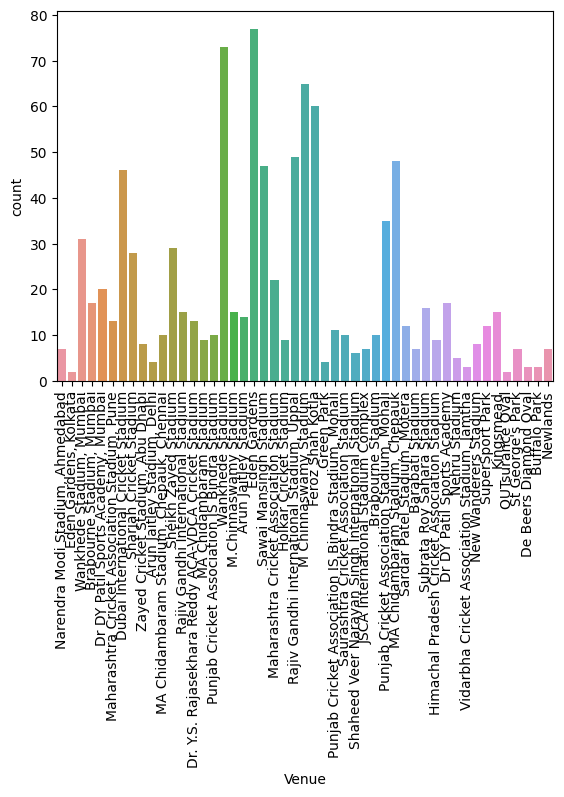

In [14]:
sns.countplot(x='Venue', data=IPL)
plt.xticks(rotation='vertical')

# Number of Matches per City

In [168]:
IPL['City'].value_counts()

City
Mumbai            159
Kolkata            79
Delhi              78
Chennai            67
Bangalore          65
Hyderabad          64
Chandigarh         56
Pune               51
Jaipur             47
Abu Dhabi          37
Ahmedabad          19
Bengaluru          15
Durban             15
Visakhapatnam      13
Dubai              13
Centurion          12
Rajkot             10
Sharjah            10
Dharamsala          9
Navi Mumbai         9
Indore              9
Johannesburg        8
Ranchi              7
Cuttack             7
Port Elizabeth      7
Cape Town           7
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Ahmedabad'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Mumbai'),
  Text(3, 0, 'Navi Mumbai'),
  Text(4, 0, 'Pune'),
  Text(5, 0, 'Dubai'),
  Text(6, 0, 'Sharjah'),
  Text(7, 0, 'Abu Dhabi'),
  Text(8, 0, 'Delhi'),
  Text(9, 0, 'Chennai'),
  Text(10, 0, 'Hyderabad'),
  Text(11, 0, 'Visakhapatnam'),
  Text(12, 0, 'Chandigarh'),
  Text(13, 0, 'Bengaluru'),
  Text(14, 0, 'Jaipur'),
  Text(15, 0, 'Indore'),
  Text(16, 0, 'Bangalore'),
  Text(17, 0, 'Kanpur'),
  Text(18, 0, 'Rajkot'),
  Text(19, 0, 'Raipur'),
  Text(20, 0, 'Ranchi'),
  Text(21, 0, 'Cuttack'),
  Text(22, 0, 'Dharamsala'),
  Text(23, 0, 'Kochi'),
  Text(24, 0, 'Nagpur'),
  Text(25, 0, 'Johannesburg'),
  Text(26, 0, 'Centurion'),
  Text(27, 0, 'Durban'),
  Text(28, 0, 'Bloemfontein'),
  Text(29, 0, 'Port Elizabeth'),
  Text(30, 0, 'Kimberley'),
  Text(31, 0, 'East Londo

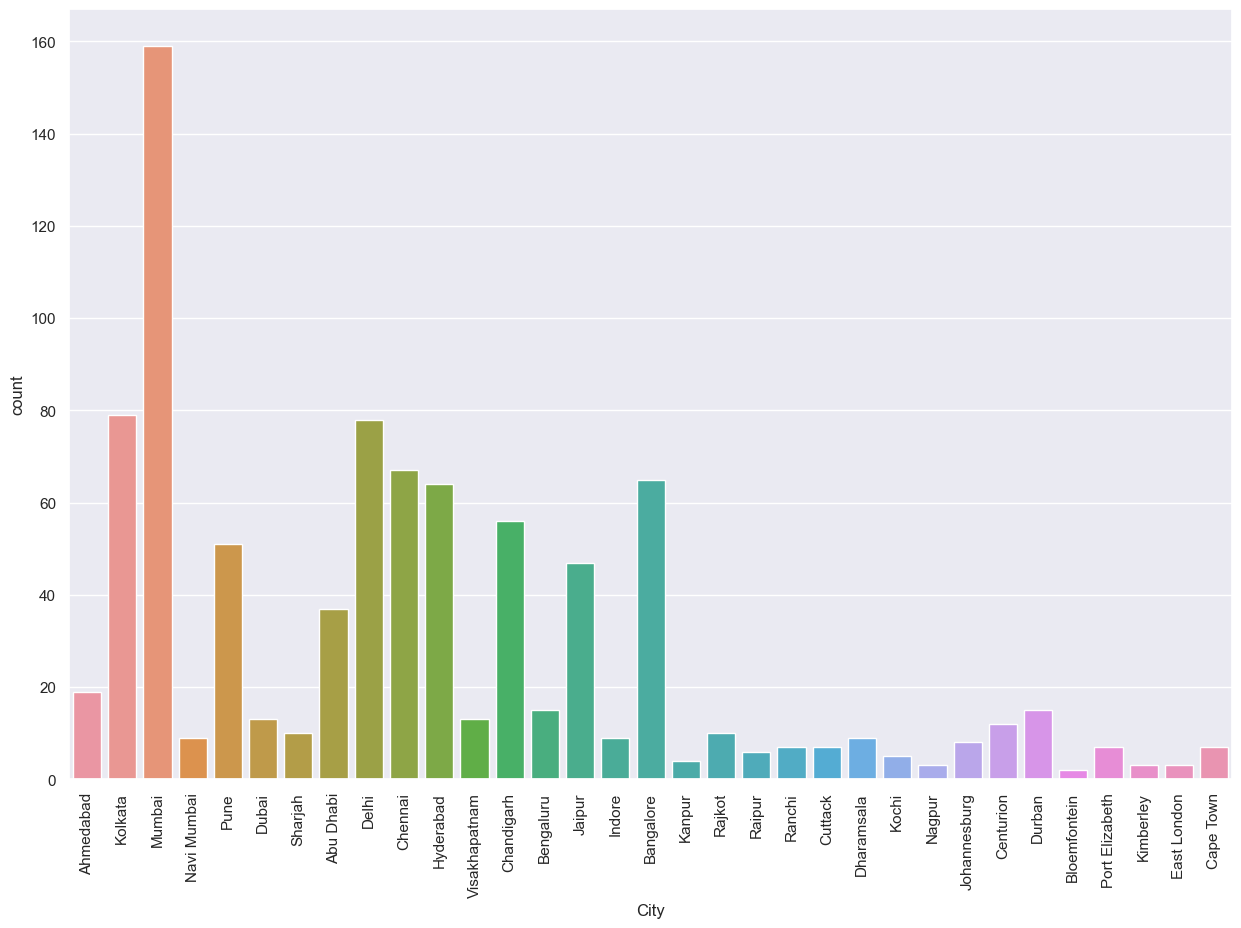

In [180]:
plt.figure(figsize=(15,10))
sns.countplot(x='City', data=IPL)
plt.xticks(rotation='vertical')

# Most Successfull Venue through winning

In [15]:
IPL.groupby('Venue')['WonBy'].value_counts()

Venue                             WonBy    
Arun Jaitley Stadium              Runs          7
                                  Wickets       6
                                  SuperOver     1
Arun Jaitley Stadium, Delhi       Wickets       3
                                  Runs          1
                                               ..
Wankhede Stadium                  SuperOver     1
Wankhede Stadium, Mumbai          Wickets      19
                                  Runs         12
Zayed Cricket Stadium, Abu Dhabi  Wickets       5
                                  Runs          3
Name: count, Length: 111, dtype: int64

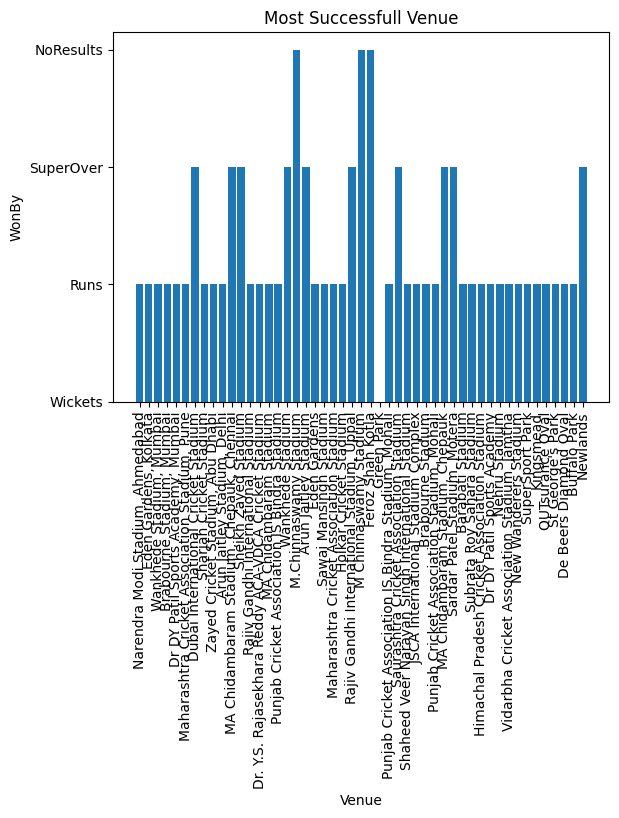

In [16]:
plt.bar(x='Venue',height='WonBy',data=IPL)
plt.xlabel("Venue")
plt.ylabel("WonBy")
plt.title("Most Successfull Venue")
plt.xticks(rotation='vertical')
plt.show()

# Most Successfull Venue through margin

In [17]:
IPL.groupby('Venue')['Margin'].value_counts()

Venue                             Margin
Arun Jaitley Stadium              5.0       4
                                  4.0       2
                                  55.0      1
                                  40.0      1
                                  34.0      1
                                           ..
Zayed Cricket Stadium, Abu Dhabi  2.0       1
                                  6.0       1
                                  9.0       1
                                  33.0      1
                                  42.0      1
Name: count, Length: 538, dtype: int64

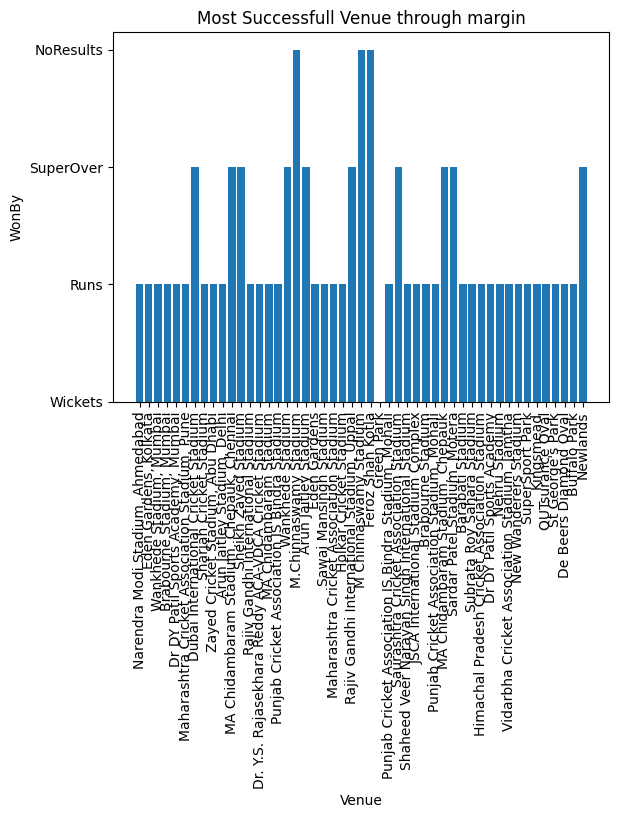

In [18]:
plt.bar(x='Venue',height='WonBy',data=IPL)
plt.xlabel("Venue")
plt.ylabel("WonBy")
plt.title("Most Successfull Venue through margin")
plt.xticks(rotation='vertical')
plt.show()

# Venue Analysis By Team1

In [19]:
IPL.groupby('Venue')['Team1'].value_counts()

Venue                             Team1                
Arun Jaitley Stadium              Delhi Daredevils         6
                                  Delhi Capitals           3
                                  Kings XI Punjab          2
                                  Kolkata Knight Riders    1
                                  Mumbai Indians           1
                                                          ..
Zayed Cricket Stadium, Abu Dhabi  Punjab Kings             1
                                  Kolkata Knight Riders    1
                                  Delhi Capitals           1
                                  Chennai Super Kings      1
                                  Sunrisers Hyderabad      1
Name: count, Length: 222, dtype: int64

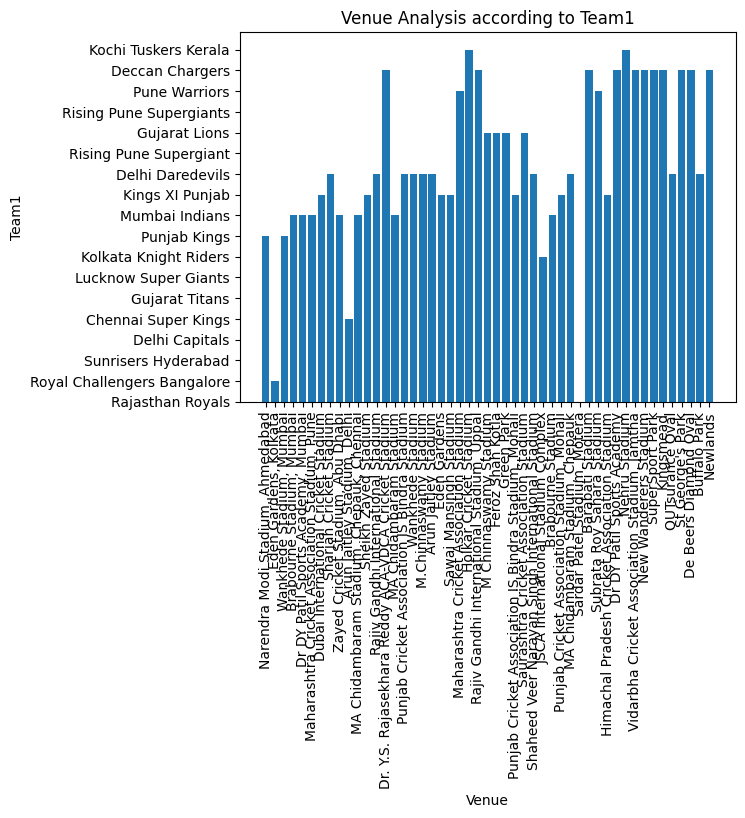

In [20]:
plt.bar(x='Venue',height='Team1',data=IPL)
plt.xlabel("Venue")
plt.ylabel("Team1")
plt.title("Venue Analysis according to Team1")
plt.xticks(rotation='vertical')
plt.show()

# Venue Analysis By Team2

In [21]:
IPL.groupby('Venue')['Team2'].value_counts()

Venue                             Team2                      
Arun Jaitley Stadium              Delhi Capitals                 4
                                  Chennai Super Kings            2
                                  Royal Challengers Bangalore    2
                                  Sunrisers Hyderabad            2
                                  Mumbai Indians                 1
                                                                ..
Zayed Cricket Stadium, Abu Dhabi  Kolkata Knight Riders          2
                                  Chennai Super Kings            1
                                  Mumbai Indians                 1
                                  Royal Challengers Bangalore    1
                                  Sunrisers Hyderabad            1
Name: count, Length: 356, dtype: int64

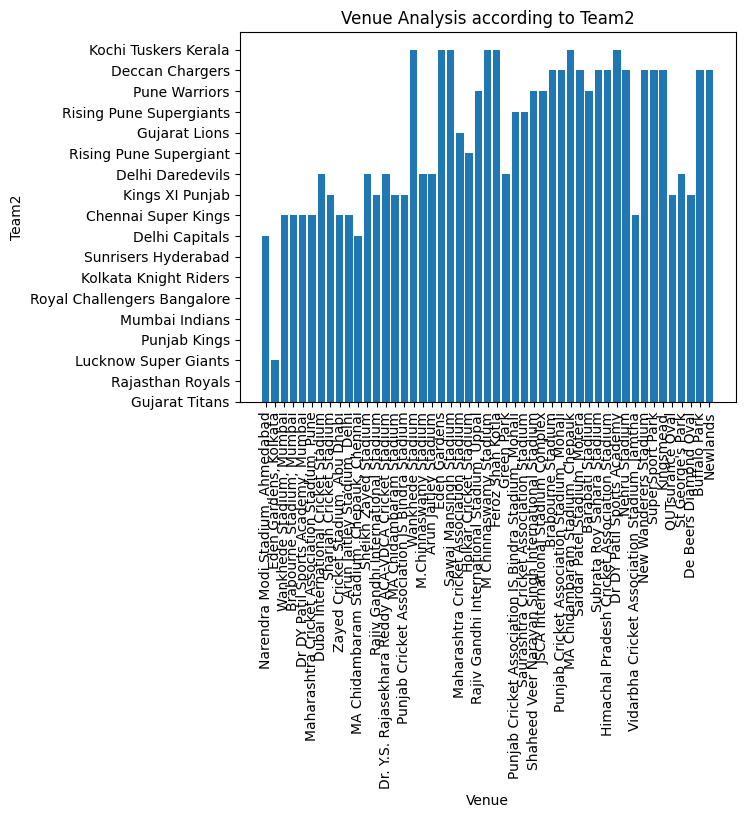

In [22]:
plt.bar(x='Venue',height='Team2',data=IPL)
plt.xlabel("Venue")
plt.ylabel("Team2")
plt.title("Venue Analysis according to Team2")
plt.xticks(rotation='vertical')
plt.show()

In [56]:
IPL.groupby('Venue')['TossWinner'].value_counts()

Venue                             TossWinner                 
Arun Jaitley Stadium              Delhi Capitals                 4
                                  Delhi Daredevils               3
                                  Rajasthan Royals               2
                                  Sunrisers Hyderabad            1
                                  Royal Challengers Bangalore    1
                                                                ..
Wankhede Stadium, Mumbai          Sunrisers Hyderabad            1
Zayed Cricket Stadium, Abu Dhabi  Kolkata Knight Riders          2
                                  Mumbai Indians                 2
                                  Rajasthan Royals               2
                                  Royal Challengers Bangalore    2
Name: count, Length: 326, dtype: int64

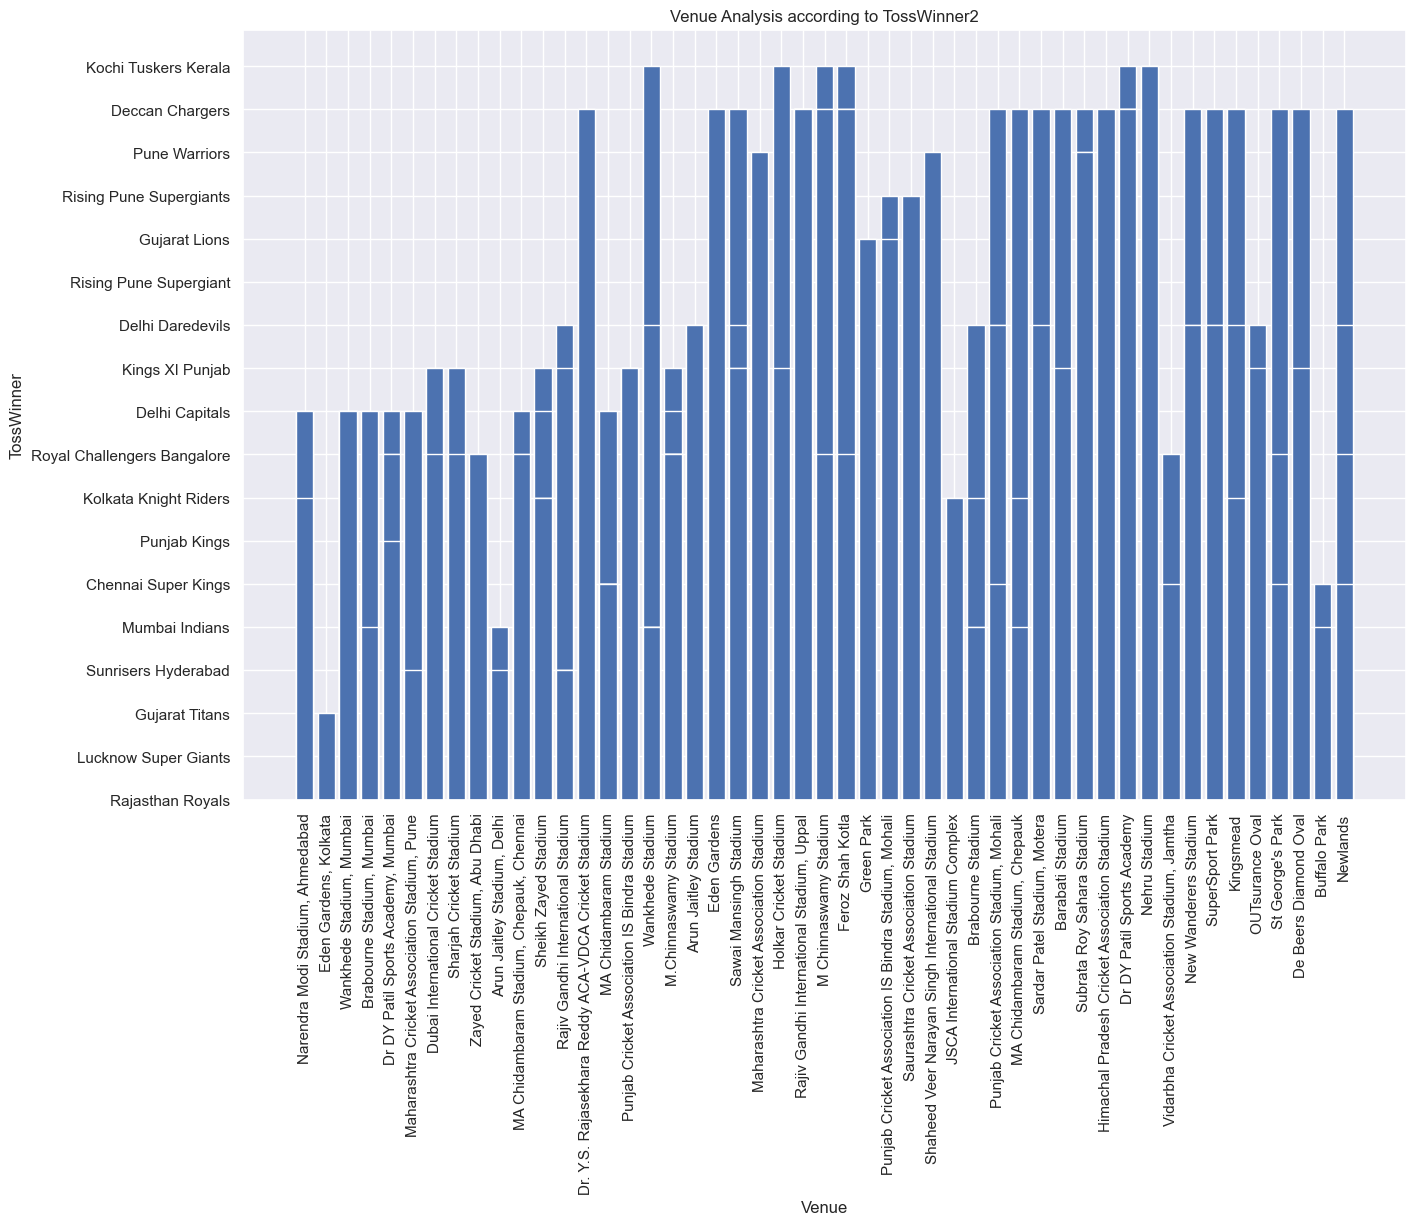

In [181]:
plt.figure(figsize=(15,10))
plt.bar(x='Venue',height='TossWinner',data=IPL)
plt.xlabel("Venue")
plt.ylabel("TossWinner")
plt.title("Venue Analysis according to TossWinner2")
plt.xticks(rotation='vertical')
plt.show()

# Calculate the match Number using Plotly Graph

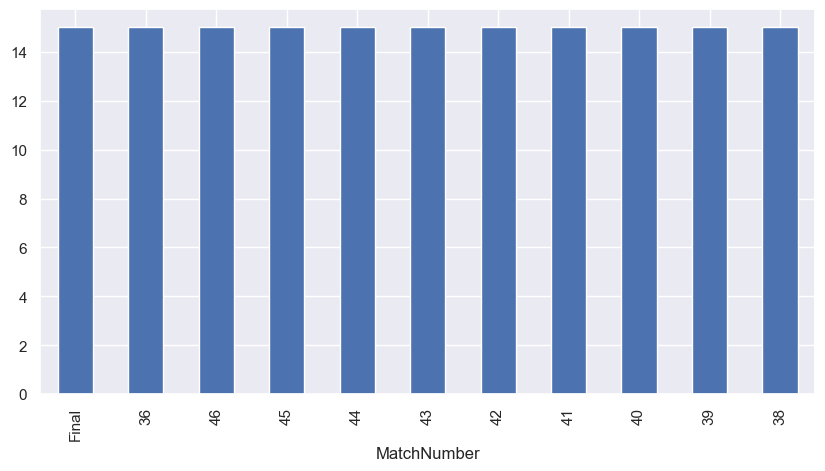

In [175]:
plt.figure(figsize=(10,5))
IPL['MatchNumber'].value_counts()[0:11].plot(kind="bar")
plt.show()

# Matches Played by Each Team

In [23]:
IPL.groupby('Team1')['Team2'].value_counts()

Team1                Team2                      
Chennai Super Kings  Mumbai Indians                 21
                     Rajasthan Royals               17
                     Kings XI Punjab                12
                     Kolkata Knight Riders          12
                     Royal Challengers Bangalore    11
                                                    ..
Sunrisers Hyderabad  Rising Pune Supergiants         1
                     Rising Pune Supergiant          1
                     Punjab Kings                    1
                     Pune Warriors                   1
                     Gujarat Titans                  1
Name: count, Length: 193, dtype: int64

<Axes: >

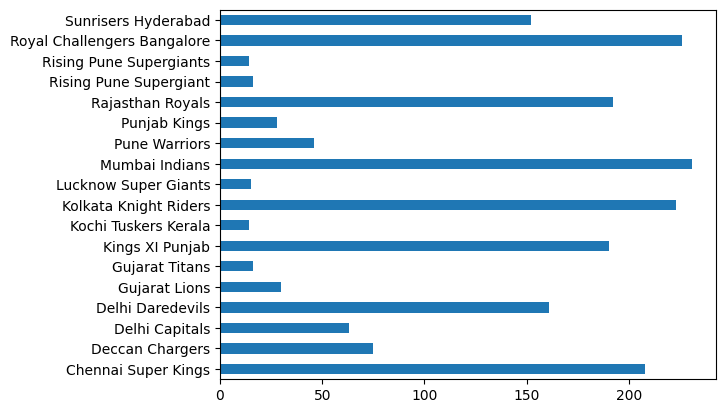

In [24]:
x=IPL['Team1'].value_counts()
y=IPL['Team2'].value_counts()
(x+y).plot(kind='barh')

In [25]:
IPL.groupby('Team1')['Team2'].value_counts()

Team1                Team2                      
Chennai Super Kings  Mumbai Indians                 21
                     Rajasthan Royals               17
                     Kings XI Punjab                12
                     Kolkata Knight Riders          12
                     Royal Challengers Bangalore    11
                                                    ..
Sunrisers Hyderabad  Rising Pune Supergiants         1
                     Rising Pune Supergiant          1
                     Punjab Kings                    1
                     Pune Warriors                   1
                     Gujarat Titans                  1
Name: count, Length: 193, dtype: int64

# Matches Won by Each Team

In [26]:
x=pd.DataFrame({"WinningTeam":IPL['WinningTeam']}).value_counts()
print(x)

WinningTeam                
Mumbai Indians                 131
Chennai Super Kings            121
Kolkata Knight Riders          114
Royal Challengers Bangalore    109
Rajasthan Royals                96
Kings XI Punjab                 88
Sunrisers Hyderabad             75
Delhi Daredevils                67
Delhi Capitals                  36
Deccan Chargers                 29
Gujarat Lions                   13
Punjab Kings                    13
Gujarat Titans                  12
Pune Warriors                   12
Rising Pune Supergiant          10
Lucknow Super Giants             9
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Gujarat Titans'),
  Text(1, 0, 'Rajasthan Royals'),
  Text(2, 0, 'Royal Challengers Bangalore'),
  Text(3, 0, 'Punjab Kings'),
  Text(4, 0, 'Mumbai Indians'),
  Text(5, 0, 'Lucknow Super Giants'),
  Text(6, 0, 'Sunrisers Hyderabad'),
  Text(7, 0, 'Delhi Capitals'),
  Text(8, 0, 'Kolkata Knight Riders'),
  Text(9, 0, 'Chennai Super Kings'),
  Text(10, 0, 'Kings XI Punjab'),
  Text(11, 0, 'Delhi Daredevils'),
  Text(12, 0, 'Rising Pune Supergiant'),
  Text(13, 0, 'Gujarat Lions'),
  Text(14, 0, 'Rising Pune Supergiants'),
  Text(15, 0, 'Pune Warriors'),
  Text(16, 0, 'Deccan Chargers'),
  Text(17, 0, 'Kochi Tuskers Kerala')])

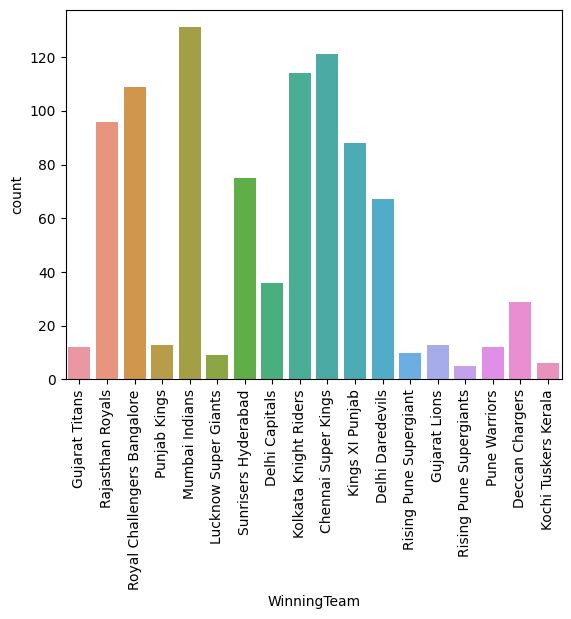

In [27]:
sns.countplot(x='WinningTeam', data=IPL)
plt.xticks(rotation='vertical')

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140')])

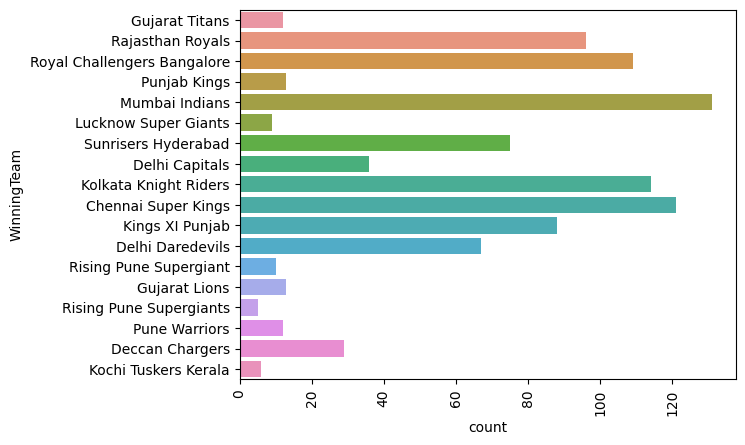

In [28]:
sns.countplot(y='WinningTeam',data=IPL)
plt.xticks(rotation='vertical')

# Team_winsbyruns_summary

In [29]:
team_winsbyruns_summary = (
    IPL.groupby("Team1")["Margin"].describe().sort_values(by="mean", ascending=False)
)
team_winsbyruns_summary

count       mean        std  min   25%   50%   
Team1                                                                       
Rising Pune Supergiant         7.0  27.428571  36.750769  5.0  6.50   7.0  \
Lucknow Super Giants           8.0  21.750000  24.111349  2.0  5.75  15.0   
Gujarat Titans                 7.0  20.714286  21.061136  8.0  8.00   8.0   
Royal Challengers Bangalore  121.0  20.239669  29.340820  1.0  6.00   8.0   
Kochi Tuskers Kerala           7.0  19.571429  19.415262  6.0  6.50   8.0   
Mumbai Indians               110.0  17.972727  20.719383  1.0  5.00   7.5   
Kings XI Punjab               92.0  17.858696  22.236779  1.0  6.00   8.0   
Chennai Super Kings          110.0  17.818182  20.279778  1.0  6.00   9.0   
Delhi Capitals                27.0  17.629630  16.675980  3.0  5.00   9.0   
Delhi Daredevils              84.0  17.428571  25.723875  1.0  6.00   7.5   
Pune Warriors                 23.0  15.521739  13.402407  1.0  7.00   8.0   
Kolkata Knight Riders        101.0  15.396040  19.417044  1.0  5.00   8.0   
Rajasthan Royals              88.0  15.318182  17.041899  2.0  6.00   8.0   
Sunrisers Hyderabad           68.0  15.000000  21.159663  2.0  5.00   7.0   
Deccan Chargers               39.0  14.153846  15.268713  1.0  5.50   8.0   
Punjab Kings                  18.0  13.722222  16.098248  4.0  6.00   6.5   
Gujarat Lions                 15.0   9.866667   7.347173  2.0  6.00   7.0   
Rising Pune Supergiants        7.0   7.571429   6.294366  2.0  3.50   4.0   

                               75%    max  
Team1                                      
Rising Pune Supergiant       35.00   97.0  
Lucknow Super Giants         24.00   75.0  
Gujarat Titans               25.50   62.0  
Royal Challengers Bangalore  18.00  144.0  
Kochi Tuskers Kerala         27.50   55.0  
Mumbai Indians               27.75  102.0  
Kings XI Punjab              22.25  111.0  
Chennai Super Kings          22.75   97.0  
Delhi Capitals               27.00   59.0  
Delhi Daredevils             14.25  146.0  
Pune Warriors                21.50   46.0  
Kolkata Knight Riders        13.00   92.0  
Rajasthan Royals             16.25   87.0  
Sunrisers Hyderabad          14.25  118.0  
Deccan Chargers              16.00   74.0  
Punjab Kings                 10.50   54.0  
Gujarat Lions                10.00   26.0  
Rising Pune Supergiants      10.50   19.0

# Team_winsbymargin_Team1

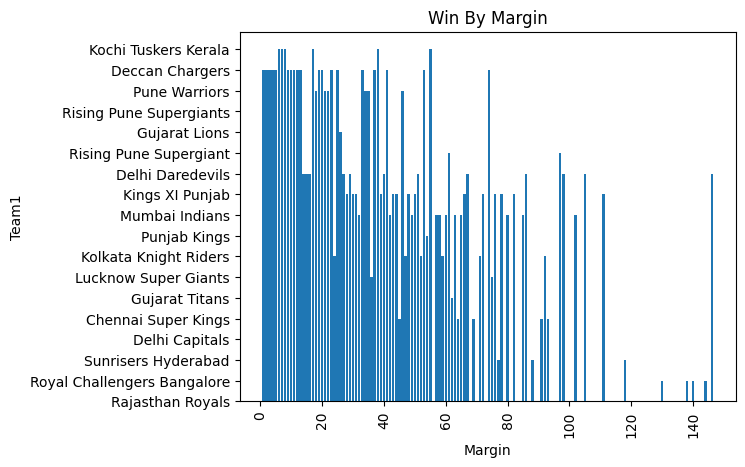

In [30]:
plt.bar(x='Margin',height='Team1',data=IPL)
plt.xlabel("Margin")
plt.ylabel("Team1")
plt.title("Win By Margin")
plt.xticks(rotation='vertical')
plt.show()

# Relation Between Winning Team and Venue

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [Text(0, 0, 'Narendra Modi Stadium, Ahmedabad'),
  Text(1, 0, 'Eden Gardens, Kolkata'),
  Text(2, 0, 'Wankhede Stadium, Mumbai'),
  Text(3, 0, 'Brabourne Stadium, Mumbai'),
  Text(4, 0, 'Dr DY Patil Sports Academy, Mumbai'),
  Text(5, 0, 'Maharashtra Cricket Association Stadium, Pune'),
  Text(6, 0, 'Dubai International Cricket Stadium'),
  Text(7, 0, 'Sharjah Cricket Stadium'),
  Text(8, 0, 'Zayed Cricket Stadium, Abu Dhabi'),
  Text(9, 0, 'Arun Jaitley Stadium, Delhi'),
  Text(10, 0, 'MA Chidambaram Stadium, Chepauk, Chennai'),
  Text(11, 0, 'Sheikh Zayed Stadium'),
  Text(12, 0, 'Rajiv Gandhi International Stadium'),
  Text(13, 0, 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'),
  Text(14, 0, 'M

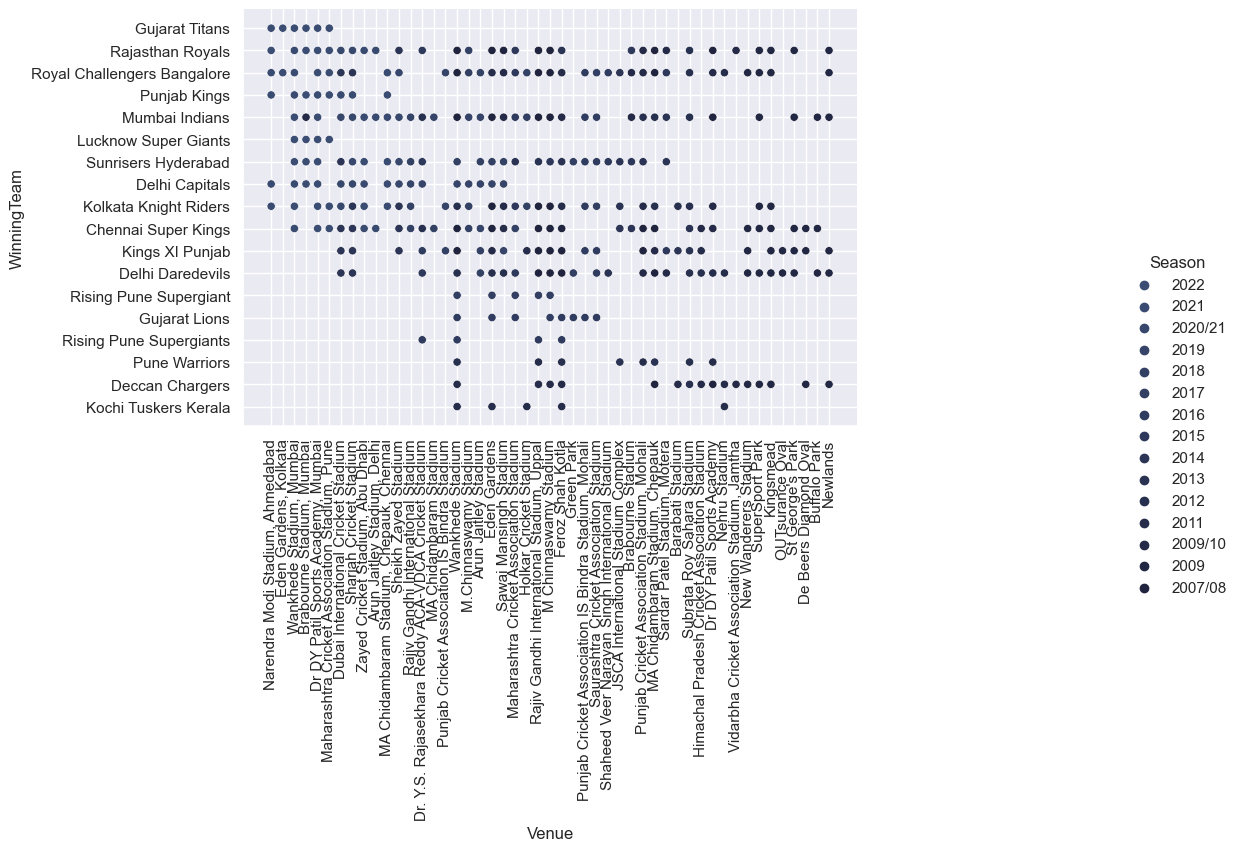

In [62]:
sns.set(rc={'figure.figsize':(100,30)})
sns.color_palette("ch:start=.2,rot=-.6", as_cmap=True)
a=sns.relplot(x='Venue',y='WinningTeam', hue='Season',palette="ch:r=-.2,l=.3",data=IPL)
a.fig.set_figwidth(20)
plt.xticks(rotation=90)

# Toss Decision

In [32]:
IPL['TossDecision'].value_counts()

TossDecision
field    599
bat      351
Name: count, dtype: int64

# Histogram of Field and Bat

(array([0, 1]), [Text(0, 0, 'bat'), Text(1, 0, 'field')])

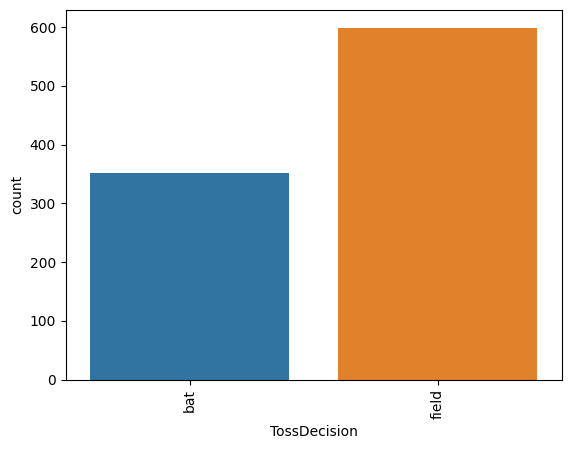

In [33]:
sns.countplot(x='TossDecision', data=IPL)
plt.xticks(rotation='vertical')

([<matplotlib.patches.Wedge at 0x1c51930bb90>,
 [Text(1.10051605660635, -0.478397752034444, 'field'),
  Text(-1.0088063852224876, 0.43853127269824, 'bat')],
 [Text(0.6419676996870374, -0.27906535535342564, '63.1%'),
  Text(-0.5502580283031749, 0.23919887601722178, '36.9%')])

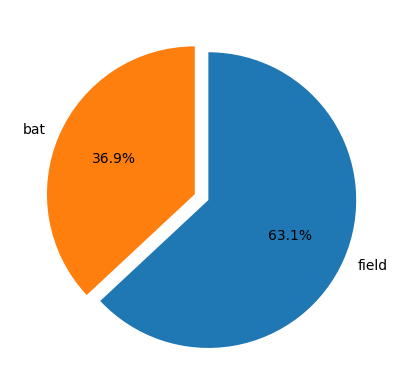

In [34]:
plt.pie(list(IPL['TossDecision'].value_counts()),labels=list(IPL['TossDecision'].value_counts().keys()),autopct='%0.1f%%',startangle=90,
       counterclock=False,explode=[0.1,0])

# Toss Decision By Team1

In [35]:
IPL.groupby('TossDecision')['Team1'].value_counts()

TossDecision  Team1                      
bat           Chennai Super Kings            63
              Mumbai Indians                 40
              Kolkata Knight Riders          37
              Delhi Daredevils               36
              Royal Challengers Bangalore    34
              Rajasthan Royals               31
              Sunrisers Hyderabad            28
              Kings XI Punjab                25
              Pune Warriors                  17
              Deccan Chargers                17
              Delhi Capitals                  8
              Gujarat Titans                  4
              Gujarat Lions                   3
              Kochi Tuskers Kerala            2
              Lucknow Super Giants            2
              Punjab Kings                    2
              Rising Pune Supergiants         2
field         Royal Challengers Bangalore    92
              Mumbai Indians                 72
              Kolkata Knight Riders          6

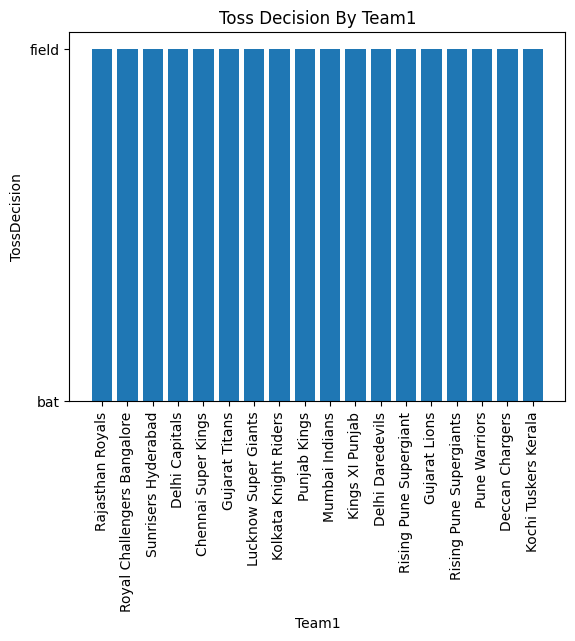

In [36]:
plt.bar(x='Team1',height='TossDecision',data=IPL)
plt.xlabel("Team1")
plt.ylabel("TossDecision")
plt.title("Toss Decision By Team1")
plt.xticks(rotation='vertical')
plt.show()

# Toss Decision By Team2

In [37]:
IPL.groupby('TossDecision')['Team2'].value_counts()

TossDecision  Team2                      
bat           Mumbai Indians                 47
              Rajasthan Royals               45
              Kolkata Knight Riders          40
              Kings XI Punjab                37
              Royal Challengers Bangalore    35
              Chennai Super Kings            33
              Delhi Daredevils               31
              Sunrisers Hyderabad            29
              Deccan Chargers                20
              Pune Warriors                  11
              Delhi Capitals                  6
              Rising Pune Supergiants         4
              Gujarat Titans                  3
              Kochi Tuskers Kerala            3
              Punjab Kings                    3
              Rising Pune Supergiant          2
              Lucknow Super Giants            2
field         Kolkata Knight Riders          78
              Mumbai Indians                 72
              Royal Challengers Bangalore    6

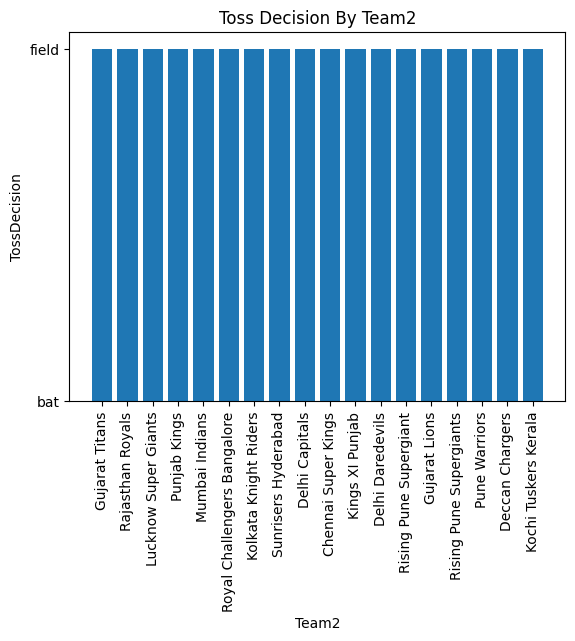

In [38]:
plt.bar(x='Team2',height='TossDecision',data=IPL)
plt.xlabel("Team2")
plt.ylabel("TossDecision")
plt.title("Toss Decision By Team2")
plt.xticks(rotation='vertical')
plt.show()

# Toss Decision that lead to winning a match

In [39]:
IPL.groupby('TossDecision')['WinningTeam'].value_counts()

TossDecision  WinningTeam                
bat           Chennai Super Kings            59
              Mumbai Indians                 52
              Kolkata Knight Riders          42
              Rajasthan Royals               40
              Royal Challengers Bangalore    35
              Delhi Daredevils               29
              Sunrisers Hyderabad            25
              Kings XI Punjab                24
              Deccan Chargers                14
              Pune Warriors                   9
              Delhi Capitals                  8
              Gujarat Titans                  5
              Gujarat Lions                   2
              Rising Pune Supergiants         2
              Punjab Kings                    2
              Lucknow Super Giants            2
field         Mumbai Indians                 79
              Royal Challengers Bangalore    74
              Kolkata Knight Riders          72
              Kings XI Punjab                6

# Realtion Between TossWinner and WinningTeam

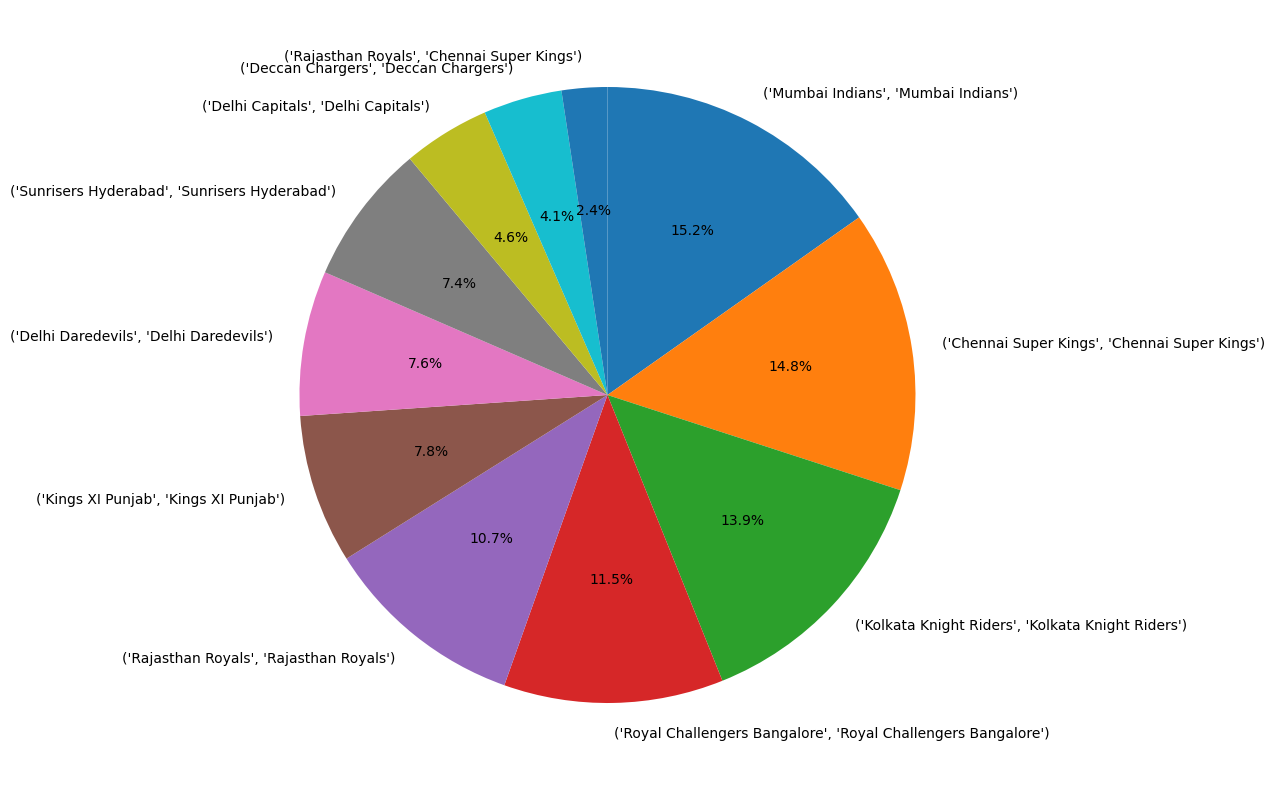

In [57]:
plt.figure(figsize=(10,10))
plt.pie(list(IPL[['TossWinner','WinningTeam']].value_counts())[0:11],labels=list(IPL[['TossWinner','WinningTeam']].value_counts().keys())[0:11],autopct='%0.1f%%',startangle=90,
       counterclock=False)
plt.show()

# Toss Decision and Player of the match

In [40]:
IPL.groupby('TossDecision')['Player_of_Match'].value_counts()

TossDecision  Player_of_Match
bat           AB de Villiers     10
              G Gambhir           9
              JH Kallis           8
              MS Dhoni            8
              KA Pollard          7
                                 ..
field         AD Mathews          1
              AP Tare             1
              AS Joseph           1
              Abhishek Sharma     1
              BA Bhatt            1
Name: count, Length: 368, dtype: int64

# Total Number of Player of the match

In [42]:
IPL['Player_of_Match'].value_counts()

Player_of_Match
AB de Villiers    25
CH Gayle          22
DA Warner         18
RG Sharma         18
MS Dhoni          17
                  ..
CR Brathwaite      1
Mohsin Khan        1
A Zampa            1
BCJ Cutting        1
MF Maharoof        1
Name: count, Length: 262, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'AB de Villiers'),
  Text(1, 0, 'CH Gayle'),
  Text(2, 0, 'DA Warner'),
  Text(3, 0, 'RG Sharma'),
  Text(4, 0, 'MS Dhoni'),
  Text(5, 0, 'YK Pathan'),
  Text(6, 0, 'SR Watson'),
  Text(7, 0, 'KA Pollard'),
  Text(8, 0, 'SK Raina'),
  Text(9, 0, 'V Kohli'),
  Text(10, 0, 'G Gambhir')])

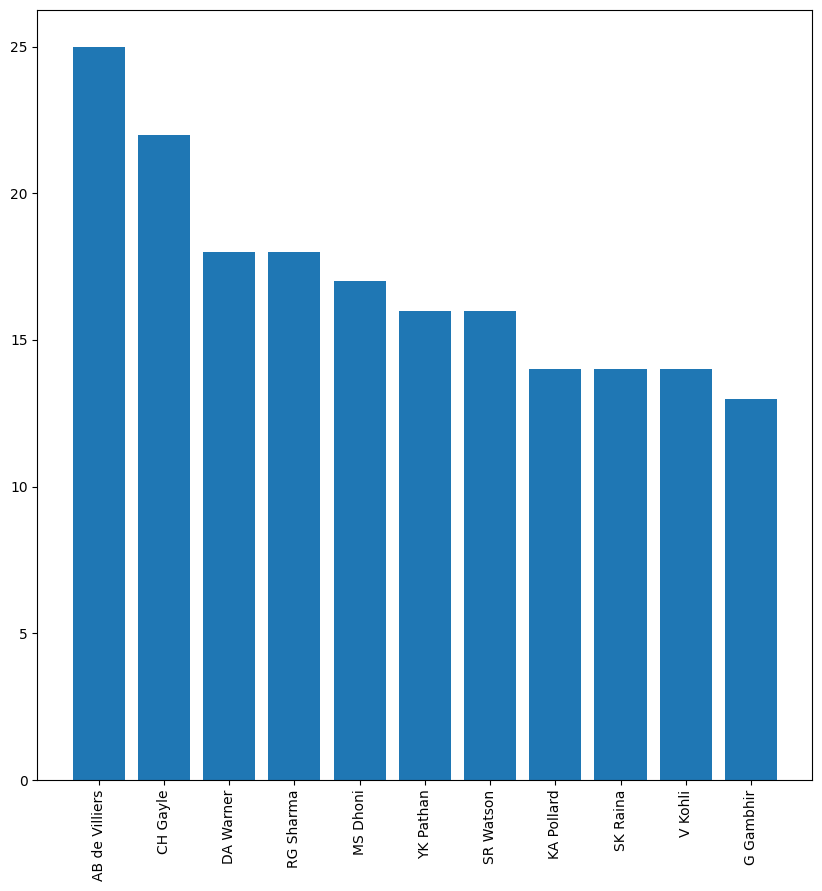

In [43]:
#Bar Plot of highest Player of the Match
plt.figure(figsize=(10,10))
plt.bar(list(IPL['Player_of_Match'].value_counts().keys()[0:11]),list(IPL['Player_of_Match'].value_counts())[0:11])
plt.xticks(rotation='vertical')

# using Plotly to find highest Player of the match

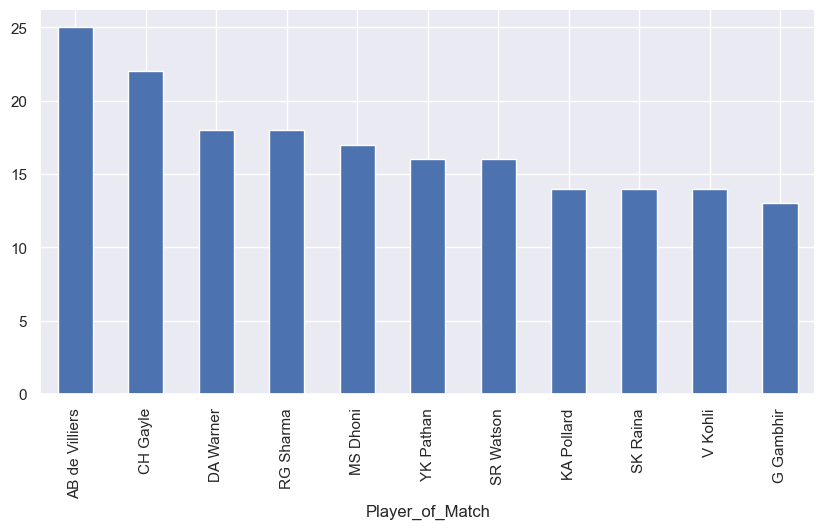

In [174]:
plt.figure(figsize=(10,5))
IPL['Player_of_Match'].value_counts()[0:11].plot(kind="bar")
plt.show()

# Player of the Match in Winning Situation

In [172]:
IPL.groupby('WinningTeam')['Player_of_Match'].value_counts()

WinningTeam          Player_of_Match
Chennai Super Kings  MS Dhoni           15
                     SK Raina           12
                     RA Jadeja          11
                     MEK Hussey         10
                     RD Gaikwad          7
                                        ..
Sunrisers Hyderabad  Abhishek Sharma     1
                     DJG Sammy           1
                     BCJ Cutting         1
                     B Stanlake          1
                     Yuvraj Singh        1
Name: count, Length: 412, dtype: int64

# Top 5 Players with the Highest Number of Man of the Match Awards

Player_of_Match
AB de Villiers    25
CH Gayle          22
DA Warner         18
RG Sharma         18
MS Dhoni          17
Name: count, dtype: int64


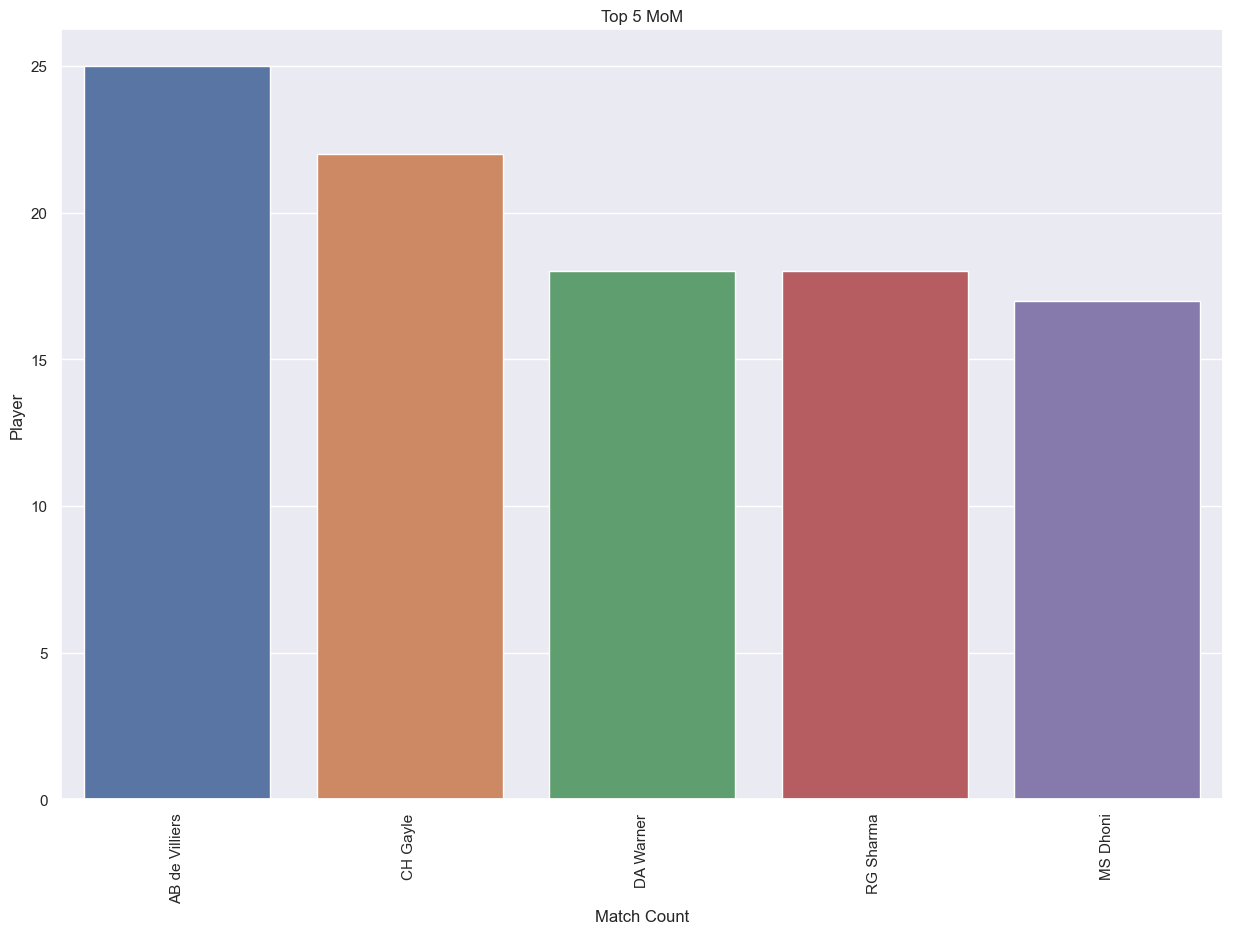

In [182]:
plt.figure(figsize=(15,10))
temp_data=IPL['Player_of_Match'].value_counts().head()
print(temp_data)
sns.barplot(x=temp_data.index,y=temp_data.values,data=IPL)
plt.title("Top 5 MoM")
plt.xticks(rotation=90)
plt.xlabel("Match Count")
plt.ylabel("Player")
plt.show()

In [171]:
IPL.groupby('Season')['Player_of_Match'].value_counts()

Season   Player_of_Match
2007/08  SE Marsh           5
         SR Watson          4
         YK Pathan          4
         AC Gilchrist       2
         M Ntini            2
                           ..
2022     M Jansen           1
         LS Livingstone     1
         LH Ferguson        1
         KS Williamson      1
         KH Pandya          1
Name: count, Length: 657, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Rajasthan Royals'),
  Text(1, 0, 'Royal Challengers Bangalore'),
  Text(2, 0, 'Sunrisers Hyderabad'),
  Text(3, 0, 'Delhi Capitals'),
  Text(4, 0, 'Chennai Super Kings'),
  Text(5, 0, 'Gujarat Titans'),
  Text(6, 0, 'Lucknow Super Giants'),
  Text(7, 0, 'Kolkata Knight Riders'),
  Text(8, 0, 'Punjab Kings'),
  Text(9, 0, 'Mumbai Indians'),
  Text(10, 0, 'Kings XI Punjab'),
  Text(11, 0, 'Delhi Daredevils'),
  Text(12, 0, 'Rising Pune Supergiant'),
  Text(13, 0, 'Gujarat Lions'),
  Text(14, 0, 'Rising Pune Supergiants'),
  Text(15, 0, 'Pune Warriors'),
  Text(16, 0, 'Deccan Chargers'),
  Text(17, 0, 'Kochi Tuskers Kerala')])

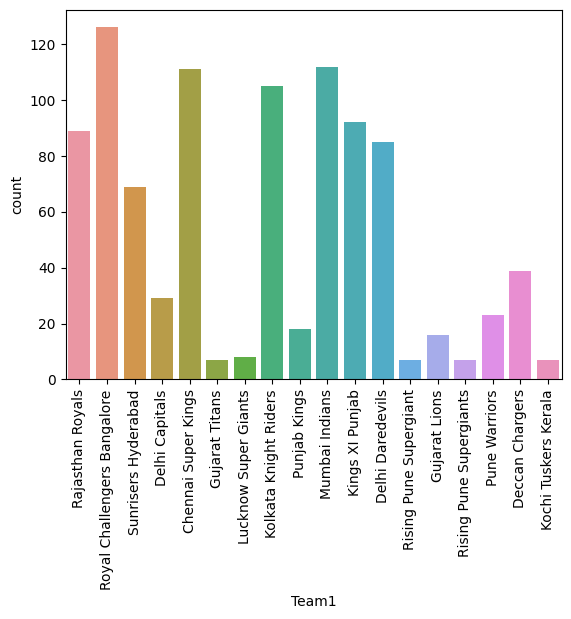

In [44]:
sns.countplot(x='Team1',data=IPL)
plt.xticks(rotation='vertical')

# Number of Match win by Each Team

<Axes: xlabel='count', ylabel='WinningTeam'>

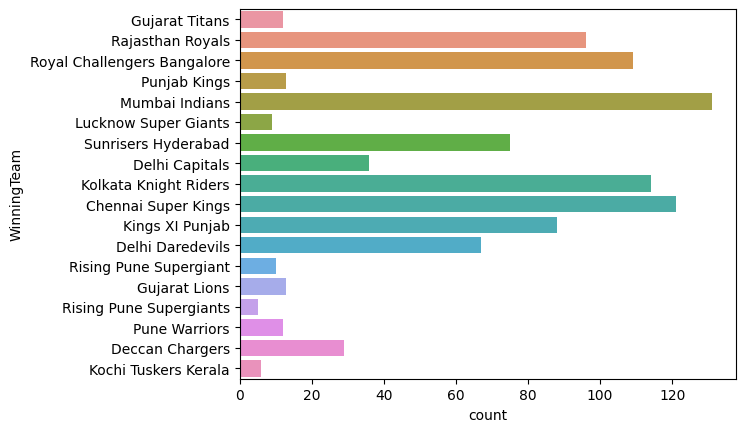

In [45]:
sns.countplot(y='WinningTeam',data=IPL)

# List of the Participating Teams

In [46]:
all_teams = IPL['Team1'].tolist() + IPL['Team2'].tolist()
all_teams = list(set(all_teams))
all_teams

['Mumbai Indians',
 'Sunrisers Hyderabad',
 'Deccan Chargers',
 'Gujarat Titans',
 'Gujarat Lions',
 'Chennai Super Kings',
 'Punjab Kings',
 'Royal Challengers Bangalore',
 'Delhi Daredevils',
 'Kings XI Punjab',
 'Pune Warriors',
 'Delhi Capitals',
 'Rising Pune Supergiant',
 'Kochi Tuskers Kerala',
 'Lucknow Super Giants',
 'Rising Pune Supergiants',
 'Kolkata Knight Riders',
 'Rajasthan Royals']

In [48]:
IPL[IPL['MatchNumber']=='Final']

ID          City        Date   Season MatchNumber   
0    1312200     Ahmedabad  2022-05-29     2022       Final  \
74   1254117         Dubai  2021-10-15     2021       Final   
134  1237181           NaN  2020-11-10  2020/21       Final   
194  1181768     Hyderabad  2019-05-12     2019       Final   
254  1136620        Mumbai  2018-05-27     2018       Final   
314  1082650     Hyderabad  2017-05-21     2017       Final   
373   981019     Bangalore  2016-05-29     2016       Final   
433   829823       Kolkata  2015-05-24     2015       Final   
492   734049     Bangalore  2014-06-01     2014       Final   
552   598073       Kolkata  2013-05-26     2013       Final   
628   548381       Chennai  2012-05-27     2012       Final   
702   501271       Chennai  2011-05-28     2011       Final   
775   419165        Mumbai  2010-04-25  2009/10       Final   
835   392239  Johannesburg  2009-05-24     2009       Final   
892   336040        Mumbai  2008-06-01  2007/08       Final   

                           Team1                        Team2   
0               Rajasthan Royals               Gujarat Titans  \
74           Chennai Super Kings        Kolkata Knight Riders   
134               Delhi Capitals               Mumbai Indians   
194               Mumbai Indians          Chennai Super Kings   
254          Sunrisers Hyderabad          Chennai Super Kings   
314               Mumbai Indians       Rising Pune Supergiant   
373  Royal Challengers Bangalore          Sunrisers Hyderabad   
433               Mumbai Indians          Chennai Super Kings   
492        Kolkata Knight Riders              Kings XI Punjab   
552          Chennai Super Kings               Mumbai Indians   
628        Kolkata Knight Riders          Chennai Super Kings   
702          Chennai Super Kings  Royal Challengers Bangalore   
775          Chennai Super Kings               Mumbai Indians   
835  Royal Challengers Bangalore              Deccan Chargers   
892          Chennai Super Kings             Rajasthan Royals   

                                         Venue                   TossWinner   
0             Narendra Modi Stadium, Ahmedabad             Rajasthan Royals  \
74         Dubai International Cricket Stadium        Kolkata Knight Riders   
134        Dubai International Cricket Stadium               Delhi Capitals   
194         Rajiv Gandhi International Stadium               Mumbai Indians   
254                           Wankhede Stadium          Chennai Super Kings   
314  Rajiv Gandhi International Stadium, Uppal               Mumbai Indians   
373                      M Chinnaswamy Stadium          Sunrisers Hyderabad   
433                               Eden Gardens          Chennai Super Kings   
492                      M Chinnaswamy Stadium        Kolkata Knight Riders   
552                               Eden Gardens               Mumbai Indians   
628            MA Chidambaram Stadium, Chepauk          Chennai Super Kings   
702            MA Chidambaram Stadium, Chepauk          Chennai Super Kings   
775                 Dr DY Patil Sports Academy          Chennai Super Kings   
835                      New Wanderers Stadium  Royal Challengers Bangalore   
892                 Dr DY Patil Sports Academy             Rajasthan Royals   

    TossDecision SuperOver            WinningTeam    WonBy  Margin method   
0            bat         N         Gujarat Titans  Wickets     7.0    NaN  \
74         field         N    Chennai Super Kings     Runs    27.0    NaN   
134          bat         N         Mumbai Indians  Wickets     5.0    NaN   
194          bat         N         Mumbai Indians     Runs     1.0    NaN   
254        field         N    Chennai Super Kings  Wickets     8.0    NaN   
314          bat         N         Mumbai Indians     Runs     1.0    NaN   
373          bat         N    Sunrisers Hyderabad     Runs     8.0    NaN   
433        field         N         Mumbai Indians     Runs    41.0    NaN   
49

# Umpiring in Winning Situation

In [49]:
IPL.groupby(['Umpire1','Umpire2'])['WinningTeam'].value_counts()

Umpire1     Umpire2          WinningTeam          
A Deshmukh  A Nand Kishore   Kings XI Punjab          1
            C Shamshuddin    Kolkata Knight Riders    1
                             Kings XI Punjab          1
            HDPK Dharmasena  Kolkata Knight Riders    1
                             Mumbai Indians           1
                                                     ..
YC Barde    AK Chaudhary     Delhi Daredevils         1
            CK Nandan        Kings XI Punjab          1
            Nitin Menon      Delhi Daredevils         2
            PR Reiffel       Mumbai Indians           1
                             Rajasthan Royals         1
Name: count, Length: 791, dtype: int64

In [51]:
IPL.groupby(['TossDecision','Venue'])['WinningTeam'].value_counts()

TossDecision  Venue                             WinningTeam          
bat           Arun Jaitley Stadium              Delhi Capitals           2
                                                Chennai Super Kings      1
                                                Sunrisers Hyderabad      1
                                                Mumbai Indians           1
                                                Delhi Daredevils         1
                                                                        ..
field         Zayed Cricket Stadium, Abu Dhabi  Rajasthan Royals         1
                                                Mumbai Indians           1
                                                Kolkata Knight Riders    1
                                                Delhi Capitals           1
                                                Sunrisers Hyderabad      1
Name: count, Length: 436, dtype: int64

# Season View

In [52]:
IPL['Season'].value_counts()

Season
2013       76
2022       74
2012       74
2011       73
2021       60
2020/21    60
2019       60
2018       60
2016       60
2014       60
2009/10    60
2017       59
2015       59
2007/08    58
2009       57
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '2022'),
  Text(1, 0, '2021'),
  Text(2, 0, '2020/21'),
  Text(3, 0, '2019'),
  Text(4, 0, '2018'),
  Text(5, 0, '2017'),
  Text(6, 0, '2016'),
  Text(7, 0, '2015'),
  Text(8, 0, '2014'),
  Text(9, 0, '2013'),
  Text(10, 0, '2012'),
  Text(11, 0, '2011'),
  Text(12, 0, '2009/10'),
  Text(13, 0, '2009'),
  Text(14, 0, '2007/08')])

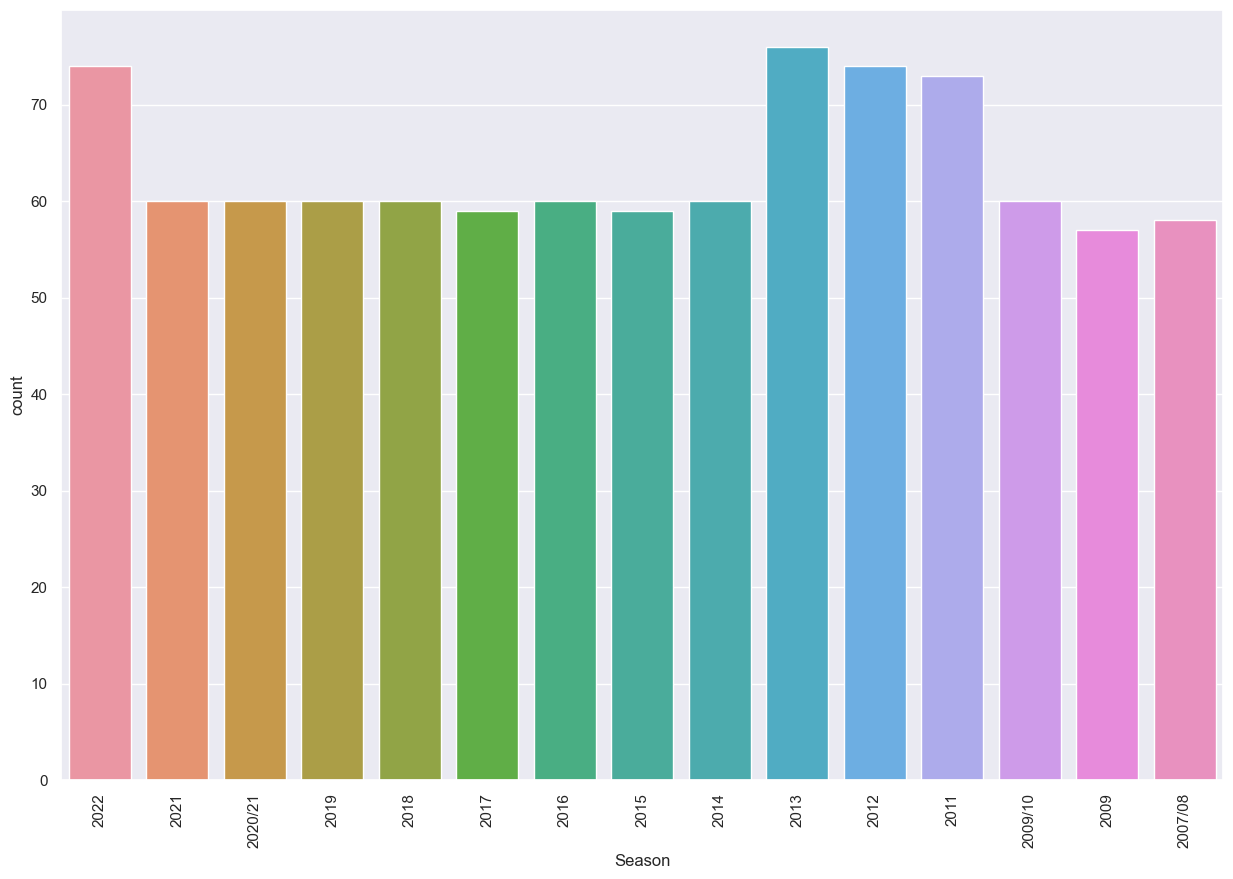

In [183]:
plt.figure(figsize=(15,10))
sns.countplot(x='Season',data=IPL)
plt.xticks(rotation='vertical')

In [53]:
IPL.groupby(['Season','TossWinner'])['WinningTeam'].value_counts()

Season   TossWinner           WinningTeam         
2007/08  Chennai Super Kings  Chennai Super Kings     3
                              Rajasthan Royals        1
                              Delhi Daredevils        1
         Deccan Chargers      Deccan Chargers         2
                              Delhi Daredevils        2
                                                     ..
2022     Sunrisers Hyderabad  Rajasthan Royals        1
                              Punjab Kings            1
                              Lucknow Super Giants    1
                              Delhi Capitals          1
                              Chennai Super Kings     1
Name: count, Length: 512, dtype: int64

# SuperOver

In [54]:
IPL['SuperOver'].value_counts()

SuperOver
N    932
Y     14
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, 'N'), Text(1, 0, 'Y')])

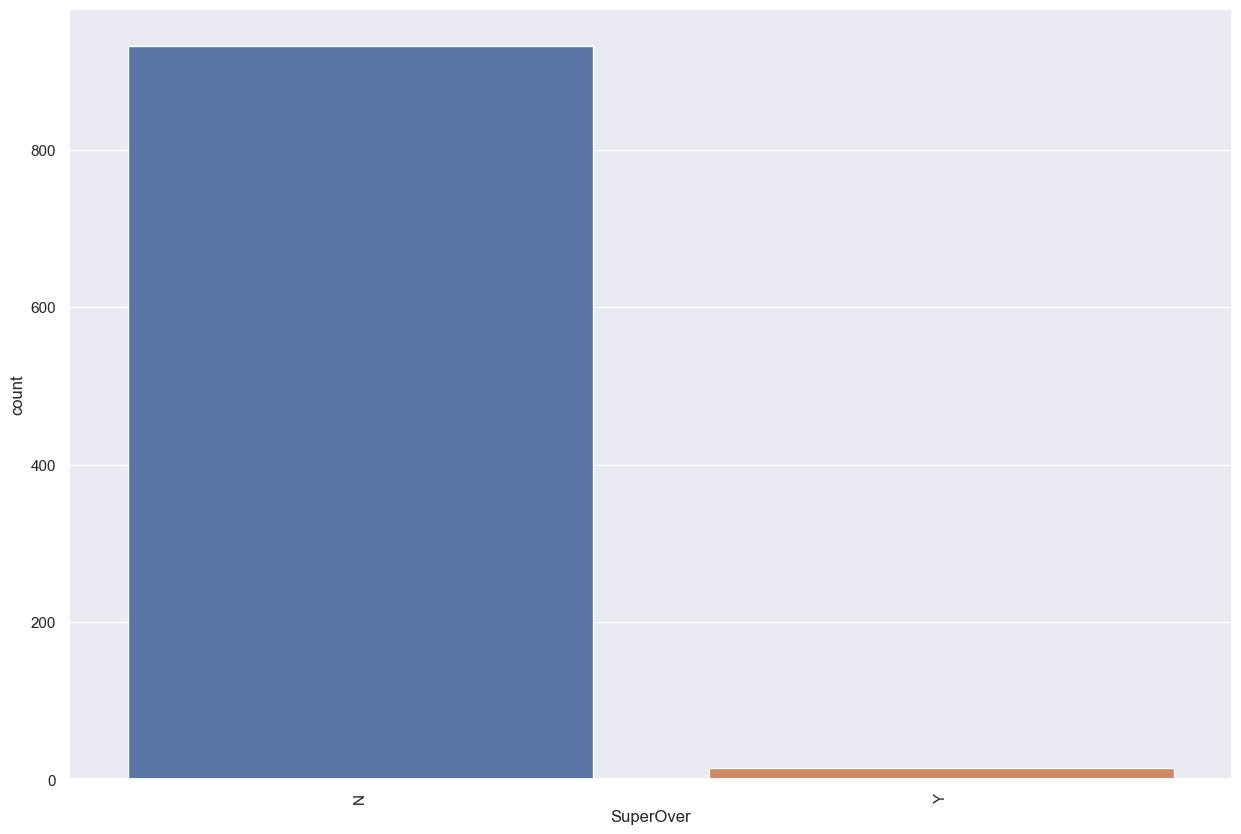

In [184]:
plt.figure(figsize=(15,10))
sns.countplot(x='SuperOver',data=IPL)
plt.xticks(rotation='vertical')

# ID and Margin

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Margin'}>]], dtype=object)

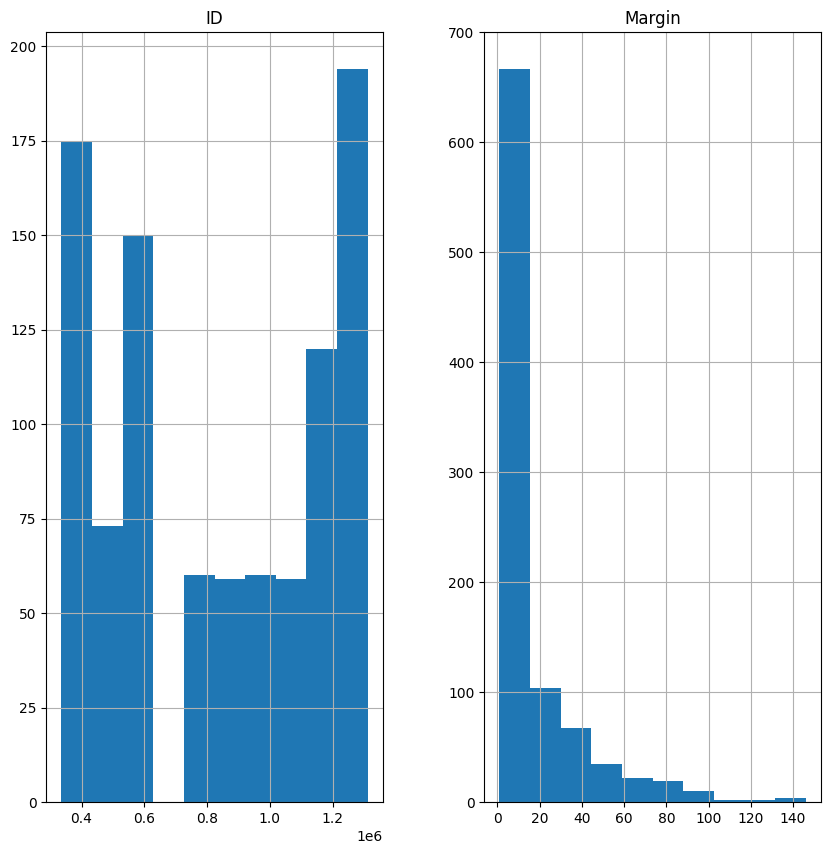

In [58]:
IPL.hist(figsize=(10,10))

# CSK

In [63]:
IPL[IPL['WinningTeam']=='CSK'].value_counts()

Series([], Name: count, dtype: int64)

In [64]:
IPL[IPL['WinningTeam']=='Chennai Super Kings']

ID         City        Date   Season MatchNumber   
19   1304101  Navi Mumbai  2022-05-08     2022          55  \
28   1304092         Pune  2022-05-01     2022          46   
41   1304079  Navi Mumbai  2022-04-21     2022          33   
52   1304068       Mumbai  2022-04-12     2022          22   
74   1254117        Dubai  2021-10-15     2021       Final   
..       ...          ...         ...      ...         ...   
921   336009        Delhi  2008-05-08  2007/08          28   
935   335996    Bangalore  2008-04-28  2007/08          15   
938   335993      Chennai  2008-04-26  2007/08          11   
942   335989      Chennai  2008-04-23  2007/08           8   
948   335983   Chandigarh  2008-04-19  2007/08           2   

                           Team1                        Team2   
19           Chennai Super Kings               Delhi Capitals  \
28           Chennai Super Kings          Sunrisers Hyderabad   
41                Mumbai Indians          Chennai Super Kings   
52           Chennai Super Kings  Royal Challengers Bangalore   
74           Chennai Super Kings        Kolkata Knight Riders   
..                           ...                          ...   
921             Delhi Daredevils          Chennai Super Kings   
935  Royal Challengers Bangalore          Chennai Super Kings   
938          Chennai Super Kings        Kolkata Knight Riders   
942          Chennai Super Kings               Mumbai Indians   
948              Kings XI Punjab          Chennai Super Kings   

                                             Venue   
19              Dr DY Patil Sports Academy, Mumbai  \
28   Maharashtra Cricket Association Stadium, Pune   
41              Dr DY Patil Sports Academy, Mumbai   
52              Dr DY Patil Sports Academy, Mumbai   
74             Dubai International Cricket Stadium   
..                                             ...   
921                               Feroz Shah Kotla   
935                          M Chinnaswamy Stadium   
938                MA Chidambaram Stadium, Chepauk   
942                MA Chidambaram Stadium, Chepauk   
948     Punjab Cricket Association Stadium, Mohali   

                      TossWinner TossDecision SuperOver          WinningTeam   
19                Delhi Capitals        field         N  Chennai Super Kings  \
28           Sunrisers Hyderabad        field         N  Chennai Super Kings   
41           Chennai Super Kings        field         N  Chennai Super Kings   
52   Royal Challengers Bangalore        field         N  Chennai Super Kings   
74         Kolkata Knight Riders        field         N  Chennai Super Kings   
..                           ...          ...       ...                  ...   
921          Chennai Super Kings        field         N  Chennai Super Kings   
935          Chennai Super Kings          bat         N  Chennai Super Kings   
938        Kolkata Knight Riders          bat         N  Chennai Super Kings   
942               Mumbai Indians        field         N  Chennai Super Kings   
948          Chennai Super Kings          bat         N  Chennai Super Kings   

       WonBy  Margin method   Player_of_Match   
19      Runs    91.0    NaN         DP Conway  \
28      Runs    13.0    NaN        RD Gaikwad   
41   Wickets     3.0    NaN  Mukesh Choudhary   
52      Runs    23.0    NaN            S Dube   
74      Runs    27.0    NaN      F du Plessis   
..       ...     ...    ...               ...   
921  Wickets     4.0    NaN          MS Dhoni   
935     Runs    13.0    NaN          MS Dhoni   
938  Wickets     9.0    NaN          JDP Oram   
942     Runs     6.0    NaN         ML Hayden   
948     Runs    33.0    NaN        MEK Hussey   

                                          Team1Players   
19   ['RD Gaikwad', 'DP Conway', 'S Dube', 'AT Rayu...  \
28   ['RD Gaikwad', 'DP Conway', 'MS Dhoni', 'RA Ja...   
41   ['RG Sharma', 'Ishan Kishan', 'D Brevis', 'SA ...   
52   ['RD Gaikwad', 'RV Uthappa', 'MM Ali', 'S Dube..

# Sentimental Analysis

In [116]:
IPL22S=pd.read_csv("E:\\Rahul\\A.I.F\\Project\\archive\\IPL_2022_tweets.csv", engine ='python')

In [117]:
IPL22S.head()

user_name user_location   
0  World Cricket Baba         india  \
1  The Times Of India     New Delhi   
2  World Cricket Baba         india   
3       𝕊𝕠𝕔𝕚𝕒𝕝 𝔸𝕟𝕚𝕞𝕒𝕝         India   
4  World Cricket Baba         india   

                                    user_description         user_created   
0  ! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...  2022-04-13 06:34:29  \
1  News. Views. Analysis. Conversations. India’s ...  2010-04-19 10:50:15   
2  ! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...  2022-04-13 06:34:29   
3          I’m here to avoid my friends on Facebook.  2013-10-15 04:34:14   
4  ! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...  2022-04-13 06:34:29   

   user_followers user_friends user_favourites user_verified   
0          1076.0           63             699         False  \
1      14429584.0          457               6          True   
2          1076.0           63             699         False   
3           124.0          502            2675         False   
4          1076.0           63             699         False   

                  date                                               text   
0  2022-06-20 22:00:03  👉World Cricket Baba!👈 Top Countries With the \...  \
1  2022-06-20 21:30:00  How fans of @ViratGang @BoldBrigade @Fanaticso...   
2  2022-06-20 20:00:24  👉World Cricket Baba!👈 Top Countries With the \...   
3  2022-06-20 19:10:00  @Chigurupati_H WOW!!\n3 ducks with 3 chicks!!\...   
4  2022-06-20 19:00:18  👉World Cricket Baba!👈 Top Countries With the \...   

                                            hashtags               source   
0  ['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...             Postify1  \
1   ['IPL2022', 'RCB', 'MI', 'CSK', 'TOISportscast']      Twitter Web App   
2  ['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...             Postify1   
3                                        ['IPL2022']  Twitter for Android   
4  ['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...             Postify1   

  is_retweet  
0      False  
1      False  
2      False  
3      False  
4      False

In [118]:
IPL22S.head()

user_name user_location   
0  World Cricket Baba         india  \
1  The Times Of India     New Delhi   
2  World Cricket Baba         india   
3       𝕊𝕠𝕔𝕚𝕒𝕝 𝔸𝕟𝕚𝕞𝕒𝕝         India   
4  World Cricket Baba         india   

                                    user_description         user_created   
0  ! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...  2022-04-13 06:34:29  \
1  News. Views. Analysis. Conversations. India’s ...  2010-04-19 10:50:15   
2  ! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...  2022-04-13 06:34:29   
3          I’m here to avoid my friends on Facebook.  2013-10-15 04:34:14   
4  ! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...  2022-04-13 06:34:29   

   user_followers user_friends user_favourites user_verified   
0          1076.0           63             699         False  \
1      14429584.0          457               6          True   
2          1076.0           63             699         False   
3           124.0          502            2675         False   
4          1076.0           63             699         False   

                  date                                               text   
0  2022-06-20 22:00:03  👉World Cricket Baba!👈 Top Countries With the \...  \
1  2022-06-20 21:30:00  How fans of @ViratGang @BoldBrigade @Fanaticso...   
2  2022-06-20 20:00:24  👉World Cricket Baba!👈 Top Countries With the \...   
3  2022-06-20 19:10:00  @Chigurupati_H WOW!!\n3 ducks with 3 chicks!!\...   
4  2022-06-20 19:00:18  👉World Cricket Baba!👈 Top Countries With the \...   

                                            hashtags               source   
0  ['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...             Postify1  \
1   ['IPL2022', 'RCB', 'MI', 'CSK', 'TOISportscast']      Twitter Web App   
2  ['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...             Postify1   
3                                        ['IPL2022']  Twitter for Android   
4  ['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...             Postify1   

  is_retweet  
0      False  
1      False  
2      False  
3      False  
4      False

In [119]:
IPL22S[34:56]

user_name                   user_location   
34                TOI Sports                New Delhi, India  \
35            Dipanshu Tyagi                  Sonipat, India   
36                 Angel One                          Mumbai   
37        World Cricket Baba                           india   
38          Times Now Sports                             NaN   
39        World Cricket Baba                           india   
40                TOI Sports                New Delhi, India   
41            Read SELECTIVE                             NaN   
42         Vinod Kumar Sapra                   Ambala, India   
43  Abhishek Chakraborty 🇮🇳🏏                  Kolkata, India   
44        World Cricket Baba                           india   
45                  Slogover                             NaN   
46        The Times Of India                       New Delhi   
47           Cricket Tracker                             NaN   
48         Rajabets India🇮🇳👑                           India   
49                TOI Sports                New Delhi, India   
50      Srimurthy Yerragorla                    Eluru, India   
51        World Cricket Baba                           india   
52               Palak Tyagi                             NaN   
53           Imperial Tiffin                             NaN   
54              Mooha Swartz  Milky-way, Observable universe   
55                  Soumya S             Chhattisgarh, India   

                                     user_description         user_created   
34  The top destination for all the major sports n...  2010-04-01 13:26:56  \
35  Books Finance Music 🎶  portoflio  \nPersonal f...  2019-05-20 13:17:23   
36  India's reputed Fintech company with 10 Millio...  2009-11-18 08:36:05   
37  ! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...  2022-04-13 06:34:29   
38  Your one-stop destination for sports news from...  2018-04-04 07:35:06   
39  ! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...  2022-04-13 06:34:29   
40  The top destination for all the major sports n...  2010-04-01 13:26:56   
41  #ReadSelective from the WORLD & Beyond, curate...  2021-05-28 06:05:01   
42  Searching friendly,caring & loving life Partner..  2017-11-24 12:31:37   
43  Works at Income Tax dept.,mad about cricket,bo...  2010-01-27 12:31:08   
44  ! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...  2022-04-13 06:34:29   
45  Follow us, if you love cricket and all the fun...  2021-05-25 18:42:30   
46  News. Views. Analysis. Conversations. India’s ...  2010-04-19 10:50:15   
47  Get all the latest News and updates from all r...  2022-03-27 08:20:04   
48               We love cricket, live with it. 🧡🤍💚♥️  2009-11-09 09:08:23   
49  The top destination for all the major sports n...  2010-04-01 13:26:56   
50                                         ẞìñçé 1997  2017-07-29 12:57:24   
51  ! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...  2022-04-13 06:34:29   
52                    finance Stocks\nHar Har Mahadev  2022-03-05 16:12:26   
53                                                NaN  2021-12-03 16:50:21   
54  CEO & Founder of Secdevices\n#Astrophysician. ...  2010-03-31 20:41:03   
55  Creating a life I love 💘\nAn MBBS Student 👩‍🎓\...  2020-08-26 06:01:09   

    user_followers user_friends user_favourites user_verified   
34       1058647.0          262              14          True  \
35          1084.0         5000           26638         False   
36        109277.0            1           51059          True   
37          1076.0           63             699         False   
38         10483.0           65              21          True   
39          1076.0           63             699         False   
40       1058647.0          262              14          True   
41            78.0            0              95         False   
42           926.0         5004          133728         False   
43          1311.0          815            7489         False   
44          1076.0           63     

In [120]:
IPL22S.shape

(574664, 13)

In [122]:
IPL22S.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574664 entries, 0 to 574663
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         574660 non-null  object 
 1   user_location     384107 non-null  object 
 2   user_description  492536 non-null  object 
 3   user_created      574655 non-null  object 
 4   user_followers    574649 non-null  float64
 5   user_friends      574649 non-null  object 
 6   user_favourites   574649 non-null  object 
 7   user_verified     574649 non-null  object 
 8   date              574649 non-null  object 
 9   text              574649 non-null  object 
 10  hashtags          574620 non-null  object 
 11  source            574640 non-null  object 
 12  is_retweet        574640 non-null  object 
dtypes: float64(1), object(12)
memory usage: 57.0+ MB


In [123]:
IPL22S.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [124]:
IPL22S.isnull().sum()

user_name                4
user_location       190557
user_description     82128
user_created             9
user_followers          15
user_friends            15
user_favourites         15
user_verified           15
date                    15
text                    15
hashtags                44
source                  24
is_retweet              24
dtype: int64

In [125]:
IPL22S.describe(include='all')

user_name user_location           user_description   
count      574660        384107                     492536  \
unique      63167         13172                      61803   
top     KGF Beast         India  Get latest cricket scores   
freq         3191         51775                       3368   
mean          NaN           NaN                        NaN   
std           NaN           NaN                        NaN   
min           NaN           NaN                        NaN   
25%           NaN           NaN                        NaN   
50%           NaN           NaN                        NaN   
75%           NaN           NaN                        NaN   
max           NaN           NaN                        NaN   

               user_created  user_followers user_friends user_favourites   
count                574655    5.746490e+05       574649          574649  \
unique                65122             NaN         8647           55016   
top     2017-08-09 11:38:02             NaN          0.0             0.0   
freq                   3368             NaN         4212            5350   
mean                    NaN    1.120746e+05          NaN             NaN   
std                     NaN    7.588829e+05          NaN             NaN   
min                     NaN    0.000000e+00          NaN             NaN   
25%                     NaN    3.900000e+01          NaN             NaN   
50%                     NaN    2.030000e+02          NaN             NaN   
75%                     NaN    1.142000e+03          NaN             NaN   
max                     NaN    2.011137e+07          NaN             NaN   

       user_verified                 date   
count         574649               574649  \
unique             5               451296   
top            False  2022-04-27 17:57:51   
freq          530516                   15   
mean             NaN                  NaN   
std              NaN                  NaN   
min              NaN                  NaN   
25%              NaN                  NaN   
50%              NaN                  NaN   
75%              NaN                  NaN   
max              NaN                  NaN   

                                                     text     hashtags   
count                                              574649       574620  \
unique                                             480197       135736   
top     @ViCustomerCare A13) 3 Sixes\n\n#ViFanOfTheMat...  ['IPL2022']   
freq                                                   76        49487   
mean                                                  NaN          NaN   
std                                                   NaN          NaN   
min                                                   NaN          NaN   
25%                                                   NaN          NaN   
50%                                                   NaN          NaN   
75%                                                   NaN          NaN   
max                                                   NaN          NaN   

                     source is_retweet  
count                574640     574640  
unique                  160          1  
top     Twitter for Android      False  
freq                 386808     574640  
mean                    NaN        NaN  
std                     NaN        NaN  
min                     NaN        NaN  
25%                     NaN        NaN  
50%                     NaN        NaN  
75%                     NaN        NaN  
max                     NaN        NaN

In [126]:
my_list=list(IPL22S)

In [127]:
print(my_list)

['user_name', 'user_location', 'user_description', 'user_created', 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'date', 'text', 'hashtags', 'source', 'is_retweet']


# ANALYSIS AND VISUALIZATION

In [130]:
IPL22S.groupby('user_location')['user_description'].value_counts()[0:31]

user_location                   user_description                                                                                                                                            
\tயாதும் ஊரே யாவரும் கேளிர் 🤝   அடி ஆத்தாடி நான் பாட்டாளி\nஉன் கூட்டாளி                                                                                                                           4
                                We don’t pray for Love We just pray for God!🙏🏽                                                                                                                    5
                                Ugly Rotten soul. Bad person. Not worth following. Follow panra alavukku inga onnum illa bro                                                                      4
                                |||DREAM11 FANTASY PLAYER||\n\n ||MYFAB11 FANTASY PLAYER||\n\n|| CrICkE™  🏏 LøV€®™ 🏏. ||\n\n|| Møß¡L€ G@M€®||\n\n||M@©Th ®€pøT€®||™🚴‍♀️🏟\n\nDAILY FREE TEAMS      2
                           

In [131]:
IPL22S['is_retweet'].value_counts()

is_retweet
False    574640
Name: count, dtype: int64

In [132]:
IPL22S.groupby('user_location')['user_followers'].value_counts()[0:51]

user_location                   user_followers
\tயாதும் ஊரே யாவரும் கேளிர் 🤝   134.0               3
                                132.0               1
                                145.0               4
                                65.0                3
                                3121.0              2
                                1.0                 1
                                3.0                 1
                                5.0                 1
                                30.0                1
                                31.0                1
                                66.0                1
                                67.0                1
                                72.0                1
                                93.0                1
                                105.0               1
                                151.0               1
                                304.0               1
                                504

In [133]:
IPL22S.groupby('date') ['text'].value_counts()[0:31]

date                 text                                                                                                                                                                                                                                                                                                              
2022-01-06 12:51:05  He believes In basics, and feels sticking to that is working well with me. \n\nCheck out excerpts of an interview with #venkateshiyer \n\nhttps://t.co/Yes1m6Lw70\n\n@BCCI @klrahul11 @imVkohli @KKRiders @sportstigerapp \n\n#INDvsSA #viratkholi #KLRahul #IPL2022 #IPL #vijayhazaretrophy                          1
2022-01-06 12:52:12  Official conformation : RPSG's Lucknow IPL Team ropes in My11Circle as title sponsor for three years. \n\n#TeamLucknow #IPL2022                                                                                                                                                                                       1
2022-0

In [134]:
IPL22S.groupby('user_name')['user_followers'].value_counts()[0:11]

user_name                                                                              user_followers
 Harish kumar                                                                          53.0              1
 hold fast to Constitutional methods of achieving our social and economic objectives.  180.0             1
!                                                                                      197.0             1
                                                                                       194.0             1
! die hard fans of faf !™️                                                             262.0             1
! हम भारतीय ! We The Bharatiya !🇮🇳                                                     122.0             1
!! NAVNEET RAI❤🥃                                                                       428.0             1
                                                                                       411.0             1
!! عالم پٹھان!!                           

C:\Users\Rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129490 (\N{CHILD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


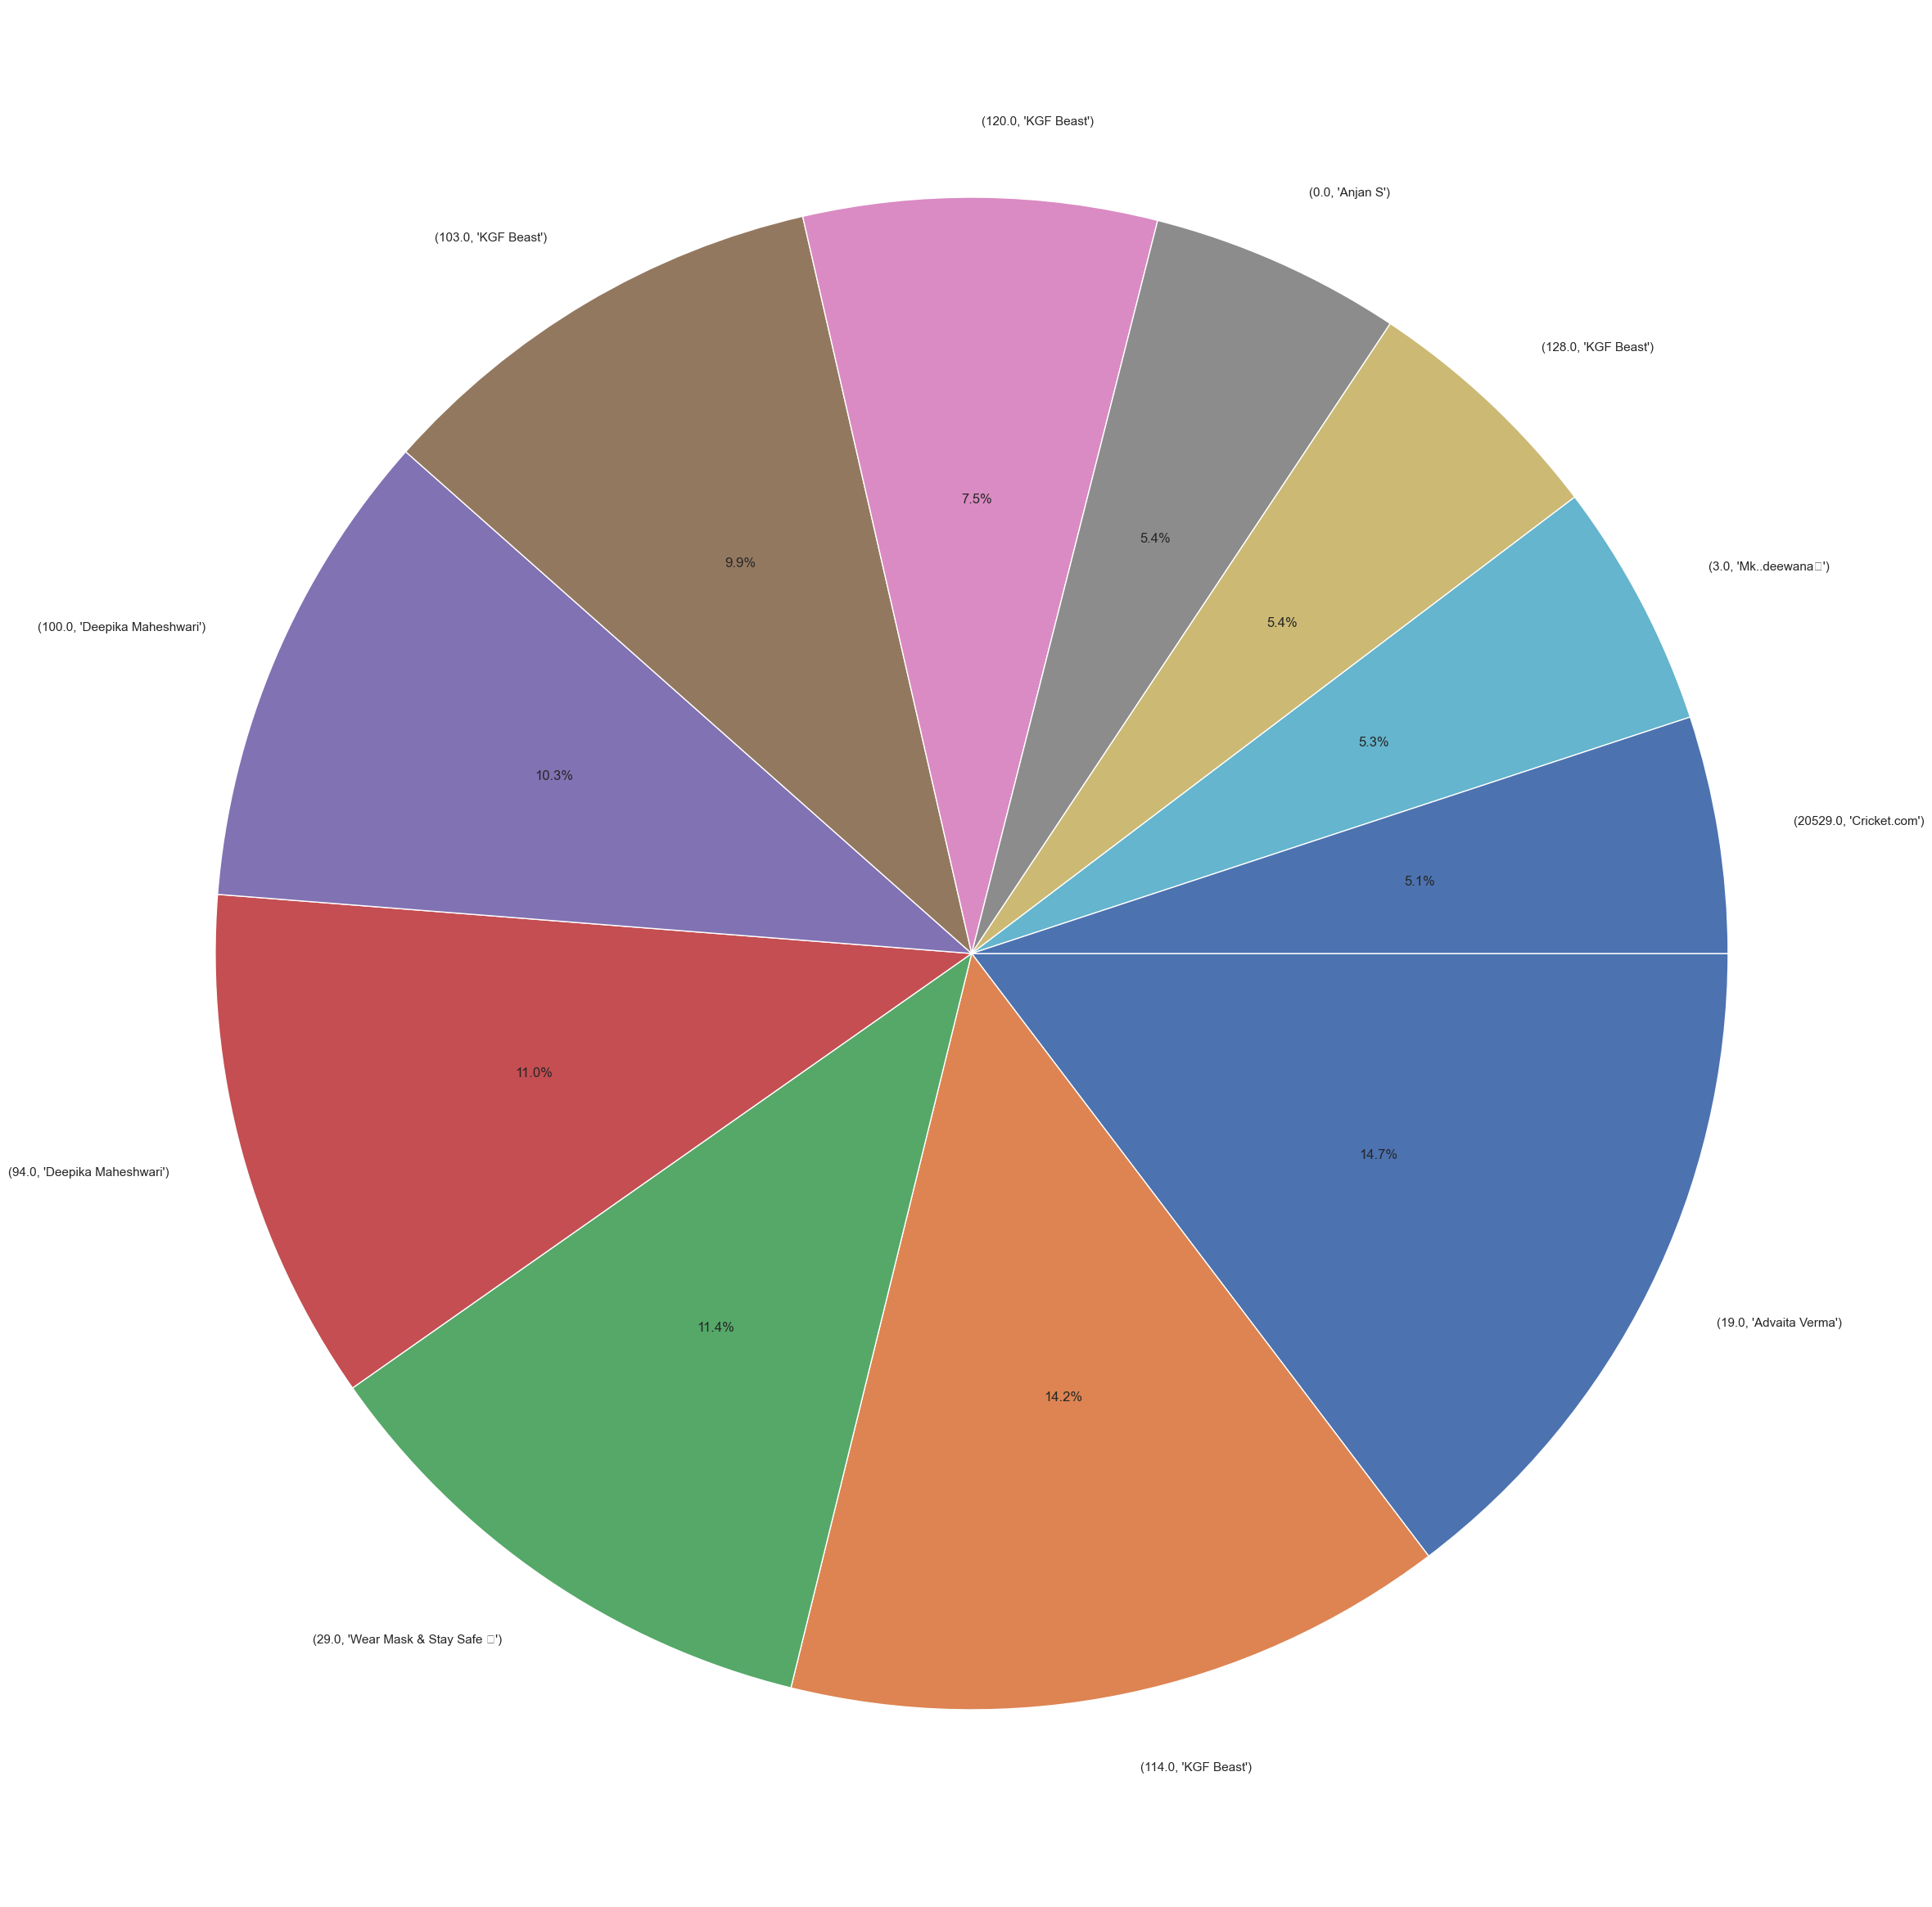

In [135]:
# Using Pie chart are user_followers and user_followers?
plt.pie(list(IPL22S[['user_followers','user_name']].value_counts())[0:11],labels=list(IPL22S[['user_followers','user_name']].value_counts().keys())[0:11],autopct="%0.1f%%",counterclock=False)
plt.show()

In [136]:
IPL22S['user_verified'].value_counts()

user_verified
False                                                                                                                                               530516
True                                                                                                                                                 44130
Rinku singh is looking so confident &amp; promising. Back him @KKRiders. #KKRvsRR #IPL2022 #KKR https://t.co/EmxqaIXdyQ                                  1
Witnessing some of the worst fielding and catch drops in #IPL2022. Something abnormal.                                                                   1
#IPL2022 Drinking Water Shortage in Wankhede today 22/4/2022. Outside Water not allowed. Inside water not available. 1/2 https://t.co/AY1NKsT2uy         1
Name: count, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'False'),
  Text(1, 0, 'True'),
  Text(2, 0, 'Rinku singh is looking so confident &amp; promising. Back him @KKRiders. #KKRvsRR #IPL2022 #KKR https://t.co/EmxqaIXdyQ'),
  Text(3, 0, 'Witnessing some of the worst fielding and catch drops in #IPL2022. Something abnormal.'),
  Text(4, 0, '#IPL2022 Drinking Water Shortage in Wankhede today 22/4/2022. Outside Water not allowed. Inside water not available. 1/2 https://t.co/AY1NKsT2uy')])

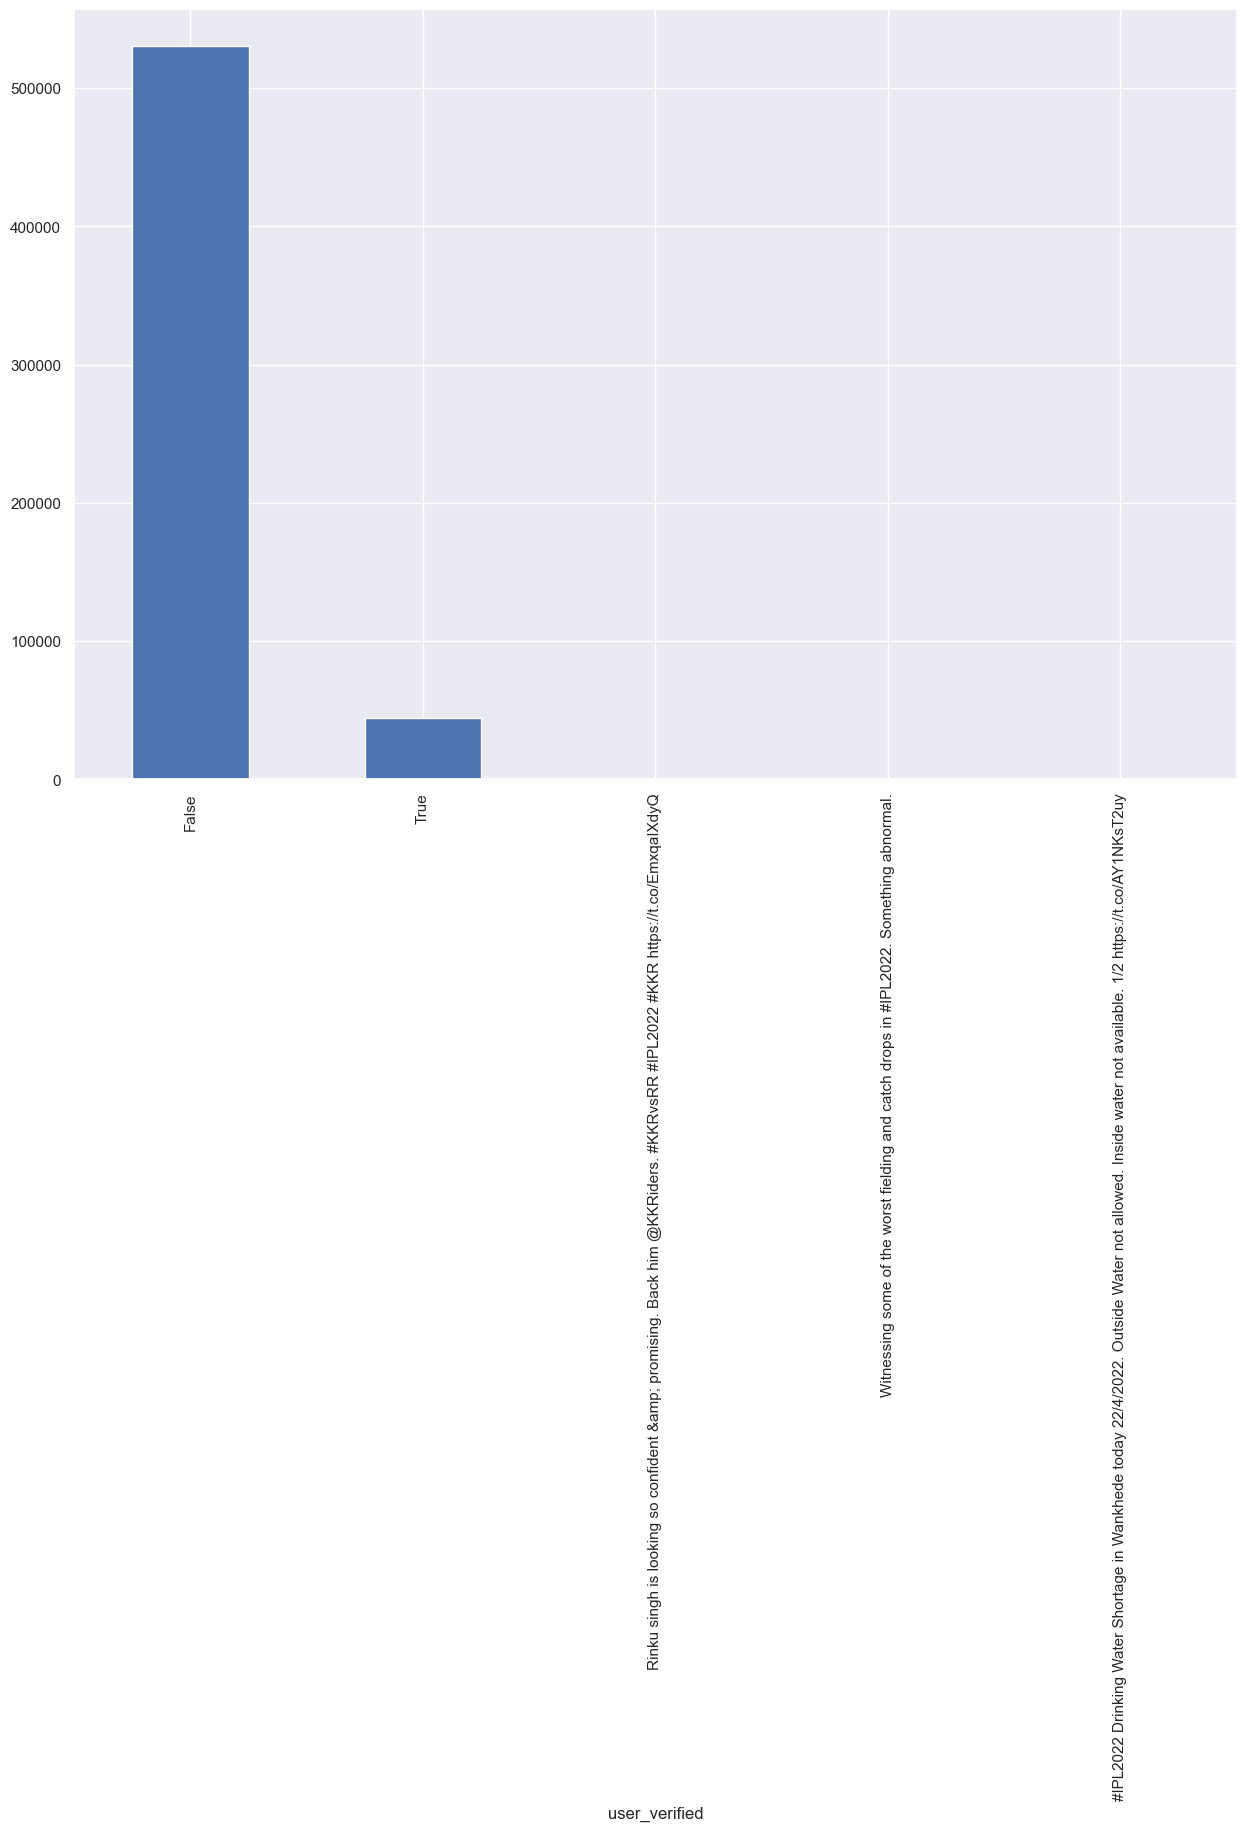

In [185]:
plt.figure(figsize=(15,10))
# Draw the bar plot to user_verified?
IPL22S.user_verified.value_counts().plot(kind='bar', rot=0)
plt.xticks(rotation=90)

In [138]:
IPL22S['user_friends'].value_counts()[0:21]

user_friends
0.0      4212
1.0      2957
3.0      2663
72.0     2575
262.0    2423
4.0      2090
349.0    2027
2.0      2025
31.0     1864
8.0      1790
13.0     1709
44.0     1610
7.0      1597
15.0     1526
35.0     1476
10.0     1475
19.0     1457
56.0     1456
33.0     1455
25.0     1450
5.0      1410
Name: count, dtype: int64

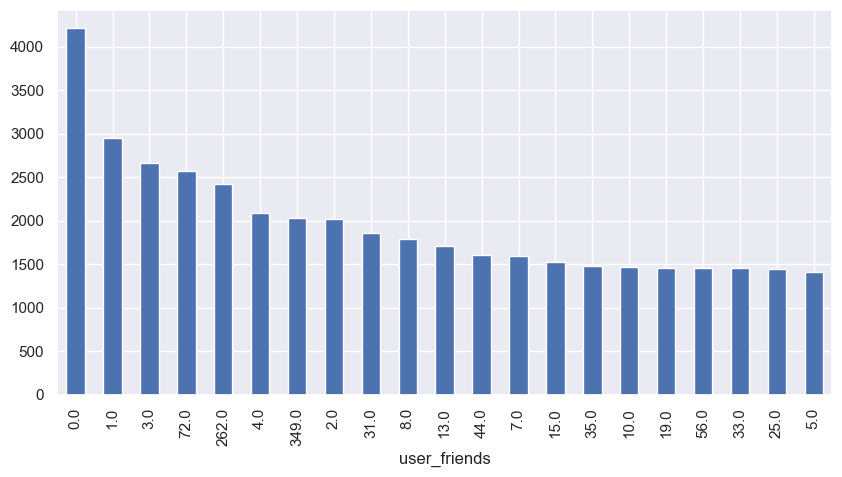

In [139]:
# barplot of user_friends?
plt.figure(figsize=(10,5))
IPL22S['user_friends'].value_counts()[0:21].plot(kind="bar")
plt.show()

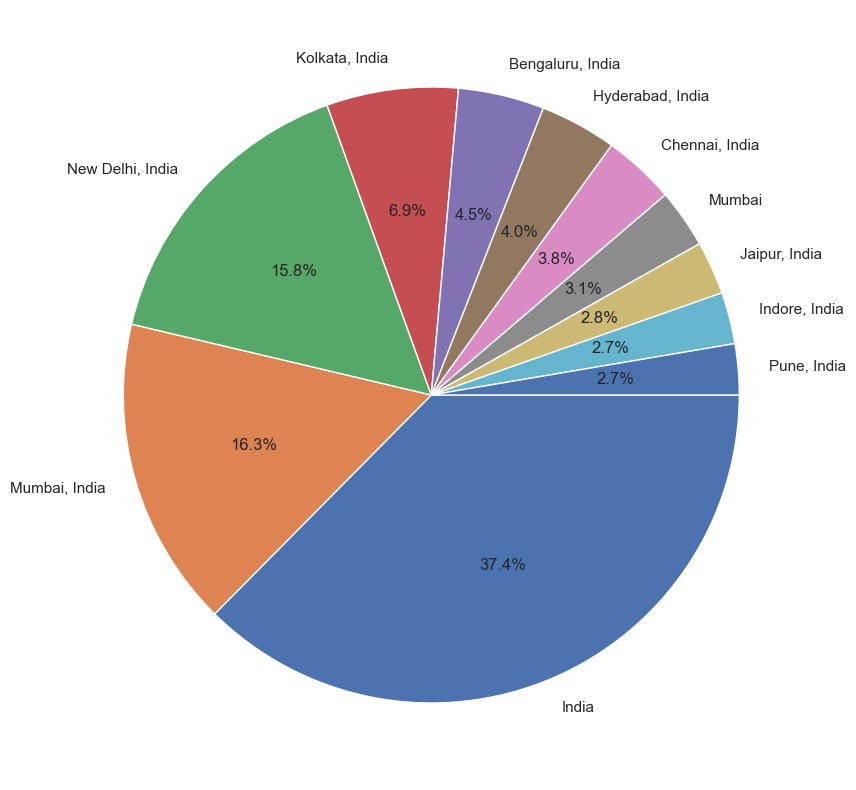

In [140]:
# Using Pie chart ?
plt.figure(figsize=(15,10))
plt.pie(list(IPL22S['user_location'].value_counts())[0:11],labels=list(IPL22S['user_location'].value_counts().keys())[0:11],autopct="%0.1f%%",counterclock=False,
       )

plt.show()

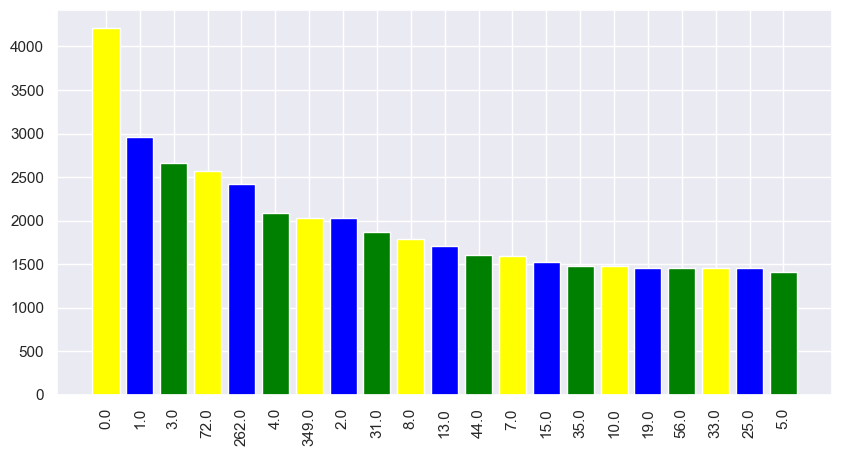

In [141]:
# Bar plot of hashtags?
plt.figure(figsize=(10,5))
plt.bar(list(IPL22S['user_friends'].value_counts().keys())[0:21],list(IPL22S['user_friends'].value_counts())[0:21],color=["Yellow","blue","green"])
plt.xticks(rotation=90)
plt.show()

In [142]:
IPL22S.groupby('user_followers')['source'].value_counts()[0:11]

user_followers  source             
0.0             Twitter for Android    6521
                Twitter Web App        2446
                Twitter for iPhone      631
                Instagram                12
                Twitter for iPad         10
                Buffer                    7
                TweetDeck                 6
                Twitter for Mac           4
                Blog2Social APP           3
                IFTTT                     1
                Tweetbot for iΟS          1
Name: count, dtype: int64

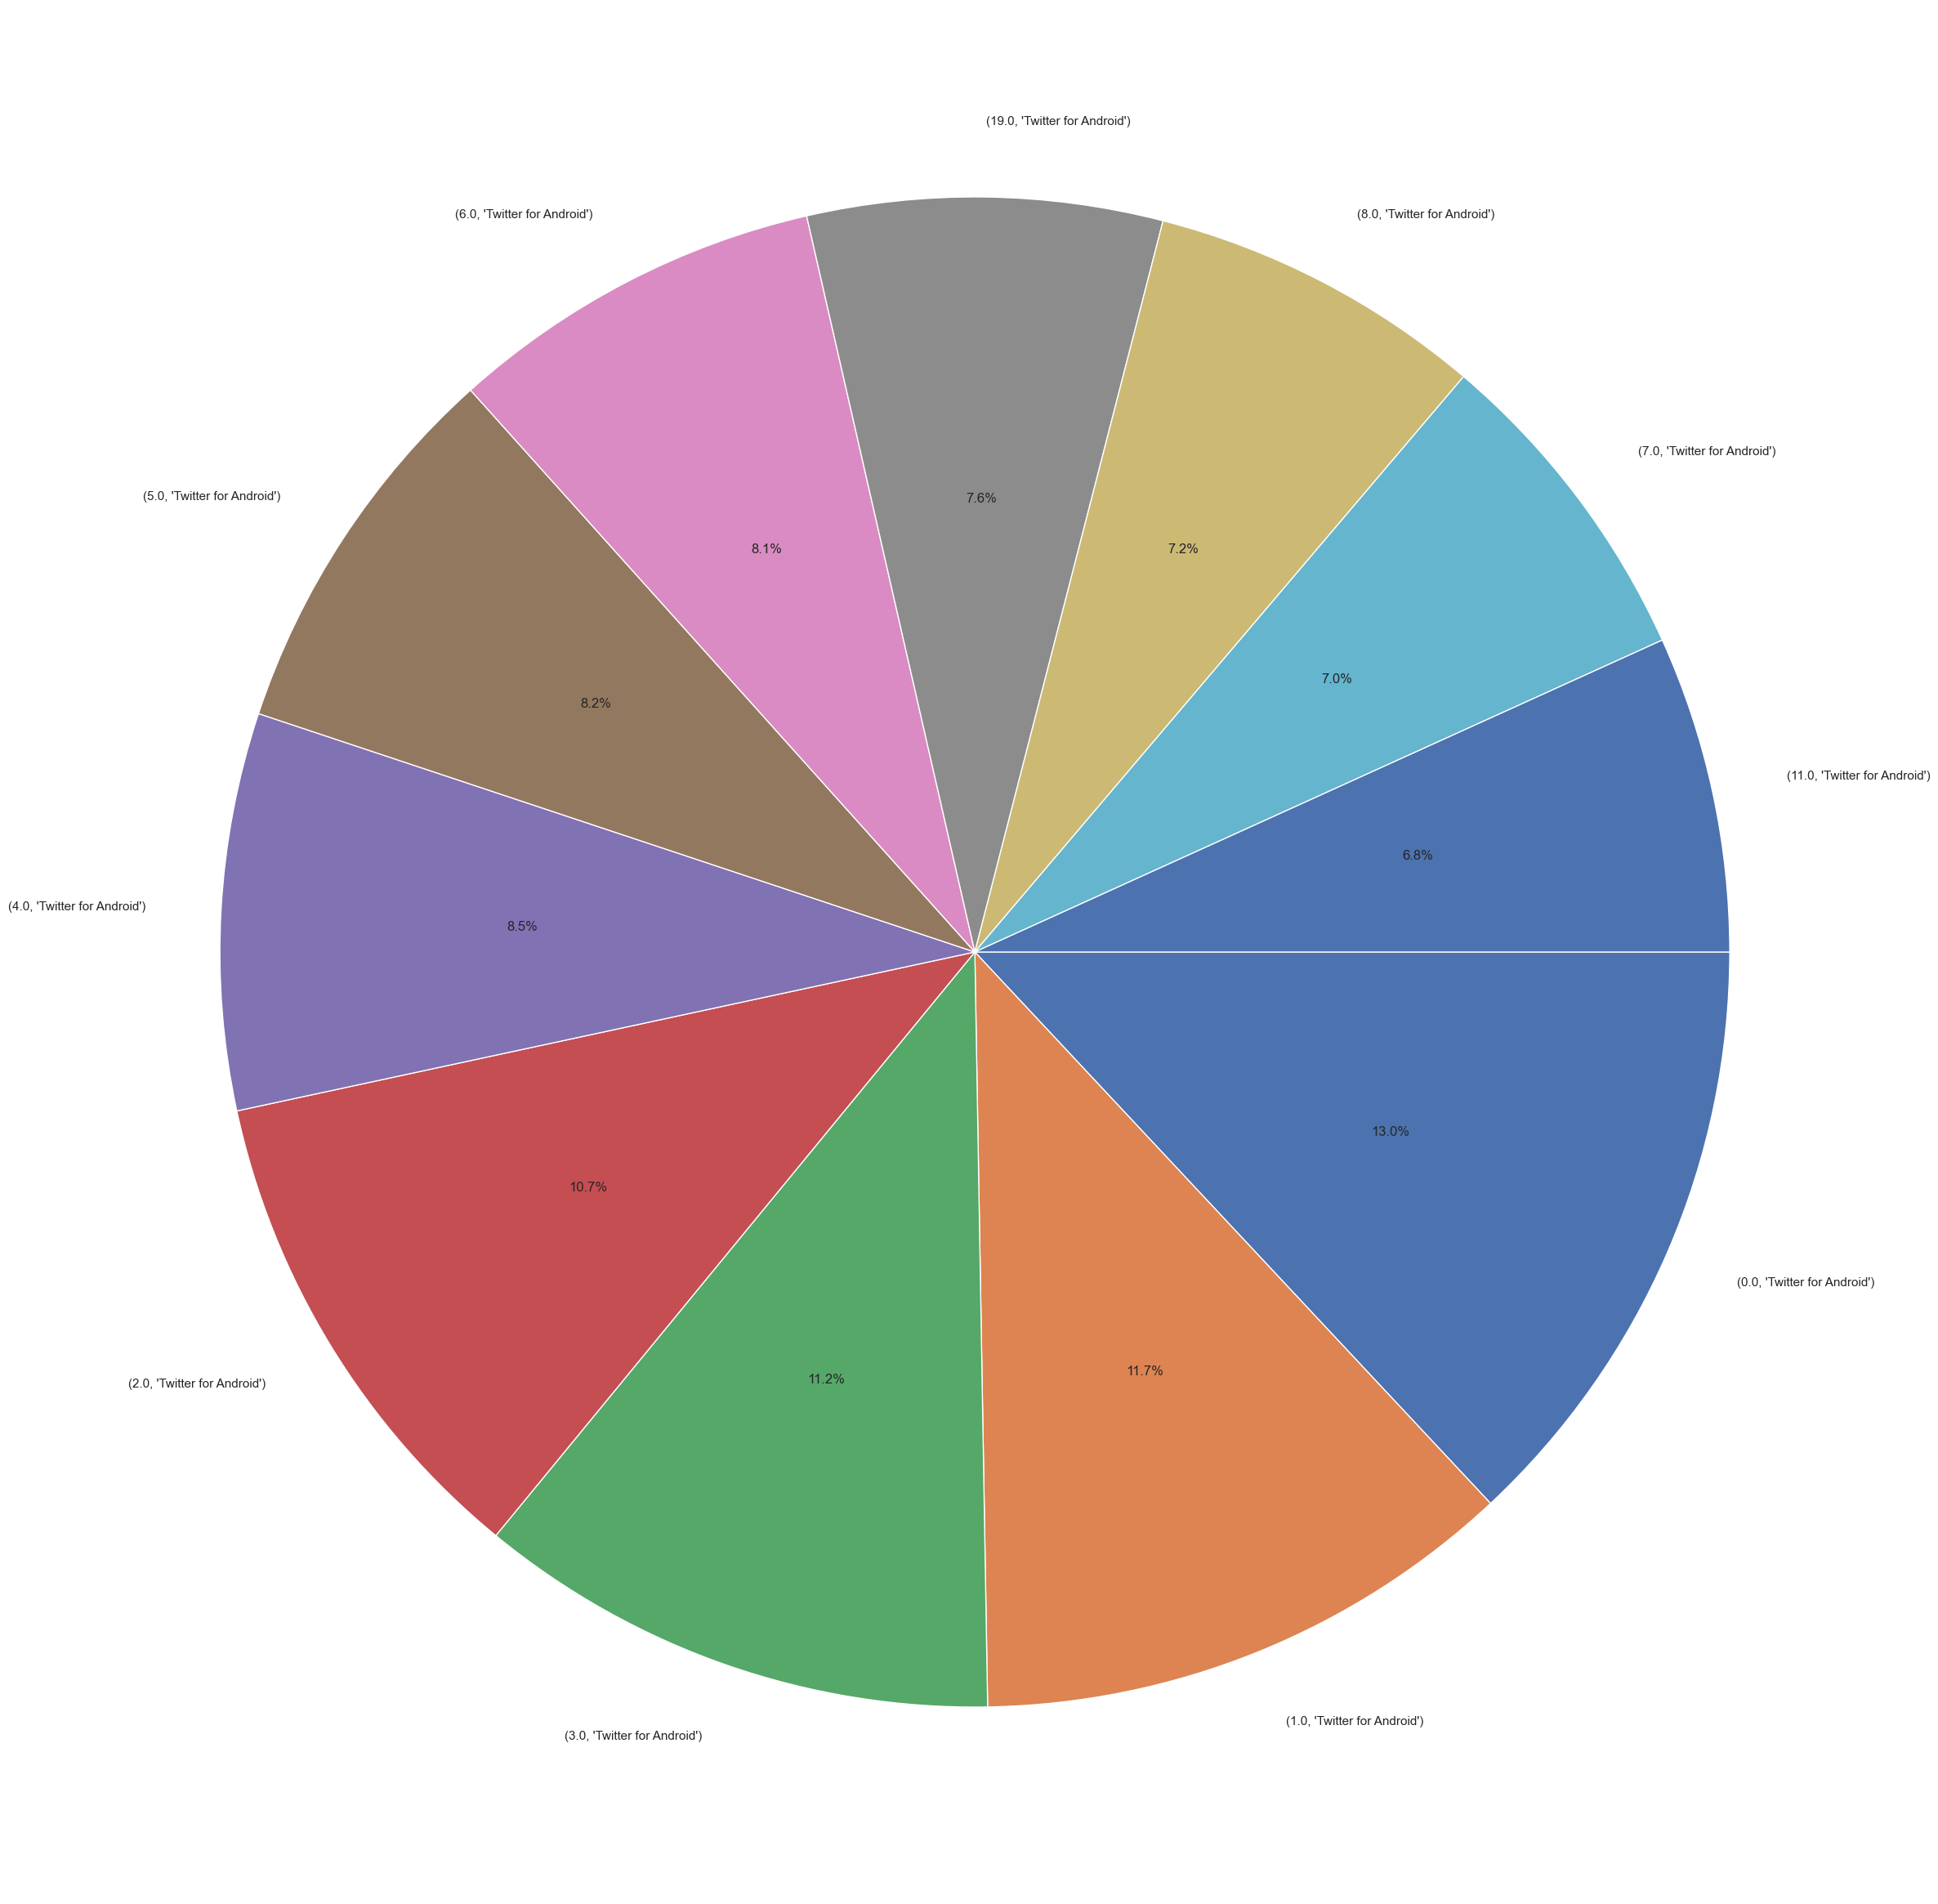

In [143]:
# Using Pie chart are user_followers and source?
plt.pie(list(IPL22S[['user_followers','source']].value_counts())[0:11],labels=list(IPL22S[['user_followers','source']].value_counts().keys())[0:11],autopct="%0.1f%%",counterclock=False)
plt.show()

In [144]:
IPL22S['user_location'].value_counts()

user_location
India                      51775
Mumbai, India              22524
New Delhi, India           21879
Kolkata, India              9554
Bengaluru, India            6250
                           ...  
जालोर, भारत                    1
Memphis, TN                    1
Southampton, Hampshire         1
Stockport                      1
 Gopalganj ,patna india        1
Name: count, Length: 13172, dtype: int64

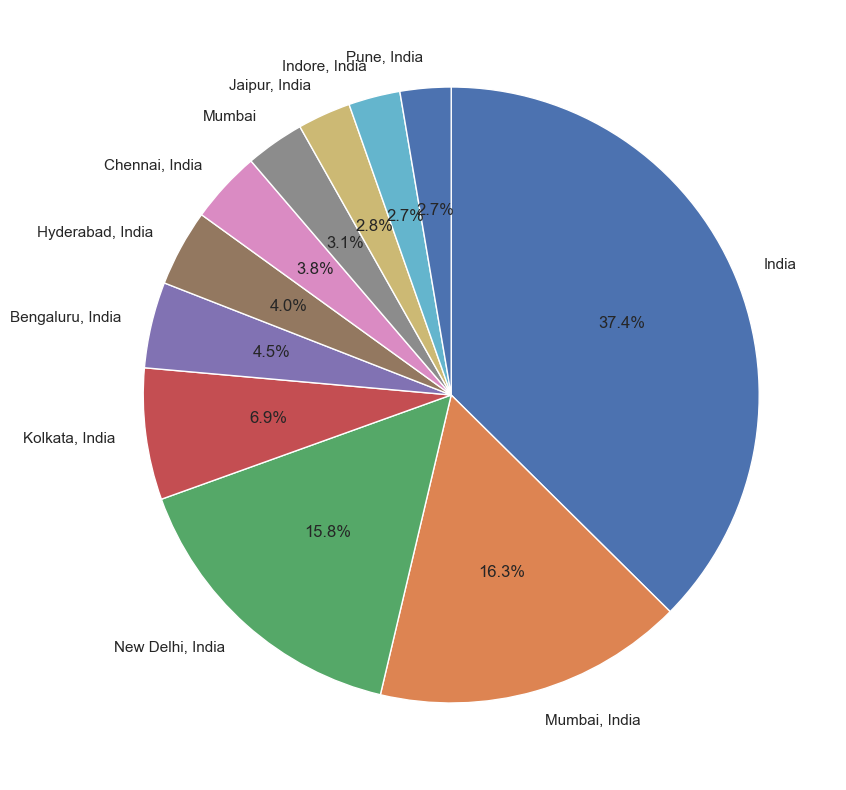

In [145]:
# Using Pie chart to find the percentage of user_location?
plt.figure(figsize=(15,10))
plt.pie(list(IPL22S['user_location'].value_counts())[0:11],labels=list(IPL22S['user_location'].value_counts().keys())[0:11],autopct="%0.1f%%",counterclock=False,
        startangle=90)

plt.show()

In [146]:
IPL22S['hashtags'].value_counts()[0:21]

hashtags
['IPL2022']                                   49487
['ViFanOfTheMatch', 'IPL2022', 'LSGvCSK']     12165
['ViFanOfTheMatch', 'IPL2022', 'KKRvPBKS']     9429
['ViFanOfTheMatch', 'IPL2022', 'CSKvRCB']      9035
['ViFanOfTheMatch', 'IPL2022', 'RCBvKKR']      8525
['ViFanOfTheMatch', 'IPL2022', 'MIvPBKS']      8349
['ViFanOfTheMatch', 'IPL2022', 'LSGvRCB']      7986
['ViFanOfTheMatch', 'IPL2022', 'RRvGT']        7919
['ViFanOfTheMatch', 'IPL2022', 'DCvRR']        7849
['ViFanOfTheMatch', 'IPL2022', 'CSKvPBKS']     7789
['ViFanOfTheMatch', 'IPL2022', 'SRHvGT']       7662
['ViFanOfTheMatch', 'IPL2022', 'MIvCSK']       7452
['ViFanOfTheMatch', 'IPL2022', 'PBKSvLSG']     7437
['ViFanOfTheMatch', 'IPL2022', 'PBKSvCSK']     7243
['ViFanOfTheMatch', 'IPL2022', 'GTvDC']        7085
['ViFanOfTheMatch', 'IPL2022', 'RRvMI']        7016
['ViFanOfTheMatch', 'IPL2022', 'GTvSRH']       6884
['ViFanOfTheMatch', 'IPL2022', 'DCvPBKS']      6743
['ViFanOfTheMatch', 'IPL2022', 'MIvLSG']       6018
['V

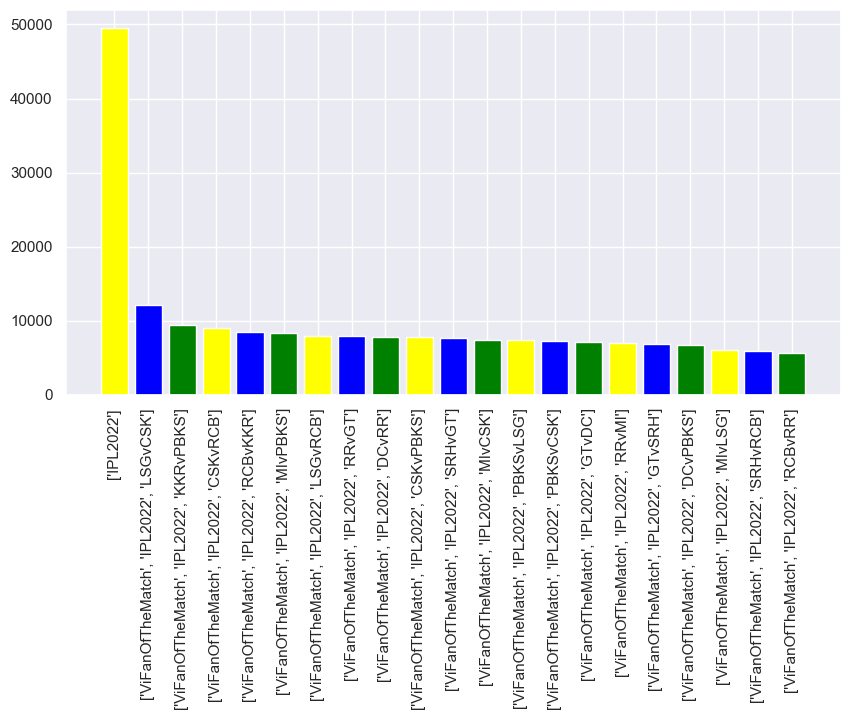

In [147]:
# Bar plot of hashtags?
plt.figure(figsize=(10,5))
plt.bar(list(IPL22S['hashtags'].value_counts().keys())[0:21],list(IPL22S['hashtags'].value_counts())[0:21],color=["Yellow","blue","green"])
plt.xticks(rotation=90)
plt.show()

In [149]:
IPL22S.groupby('source')['hashtags'].value_counts()

source               hashtags                                                                                
24liveblog           ['IPL2022', 'IPLAuction']                                                                   2
                     ['IPL2021', 'IPL2022', 'IPLAuction']                                                        1
                     ['iplmegaauction', 'ipl2022']                                                               1
                     ['ipl2022', 'IPLMegaAuction']                                                               1
                     ['IPLMEGAAUCTION', 'IPL2022']                                                               1
                                                                                                                ..
tweechaPrime         ['IPL2022', 'PBKSvCSK']                                                                     3
                     ['IPL2022', 'GTvSRH']                                           

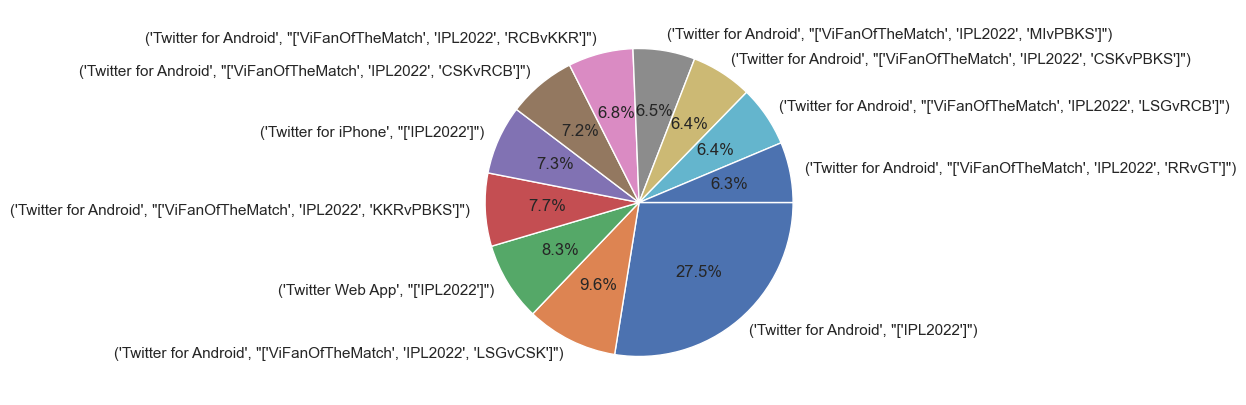

In [150]:
# Using Pie chart to find the source and hashtags?
plt.figure(figsize=(10,5))
plt.pie(list(IPL22S[['source','hashtags']].value_counts())[0:11],labels=list(IPL22S[['source','hashtags']].value_counts().keys())[0:11],autopct="%0.1f%%",counterclock=False,
       )

plt.show()

# FINDING OUT THAT USER IS VERIFIED OR NOT

In [151]:
# Calculating the proportion of verified users
verified_users = IPL22S['user_verified'].value_counts(normalize=True) * 100

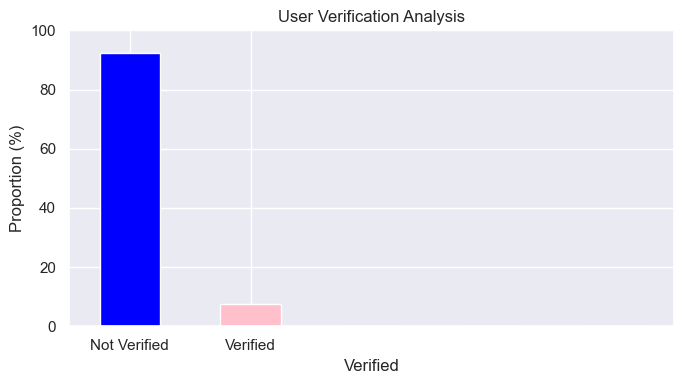

In [152]:
# Plotting the analysis
plt.figure(figsize=(7, 4))
verified_users.plot(kind='bar', color=['blue','pink'])
plt.title('User Verification Analysis')
plt.xlabel('Verified')
plt.ylabel('Proportion (%)')
plt.xticks([0, 1], ['Not Verified', 'Verified'], rotation=0)
plt.ylim(0, 100)
plt.tight_layout()

# Show the plot
plt.show()

# FINDING OUT THAT WHICH TWEET IS RETWEET OR NOT.

In [153]:
# Calculating the percentage of retweets
retweet_percentage = (IPL22S['is_retweet'].sum() / len(IPL22S)) * 100

In [154]:
# Calculating the percentage of original tweets
original_tweet_percentage = 100 - retweet_percentage

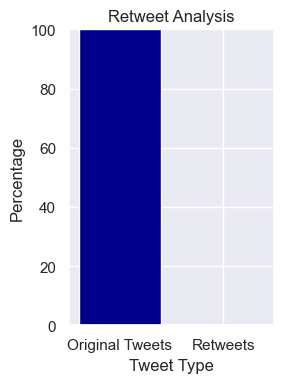

In [155]:
# Plotting the analysis
plt.figure(figsize=(3, 4))
plt.bar(['Original Tweets', 'Retweets'], [original_tweet_percentage, retweet_percentage], color=['darkblue', 'gray'])
plt.title('Retweet Analysis')
plt.xlabel('Tweet Type')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.tight_layout()

# Show the plot
plt.show()

# FINDING OUT THE SOURCE OF TWEETS

In [156]:
# Create a frequency count of tweet sources
source_counts = IPL22S['source'].value_counts().head(10)

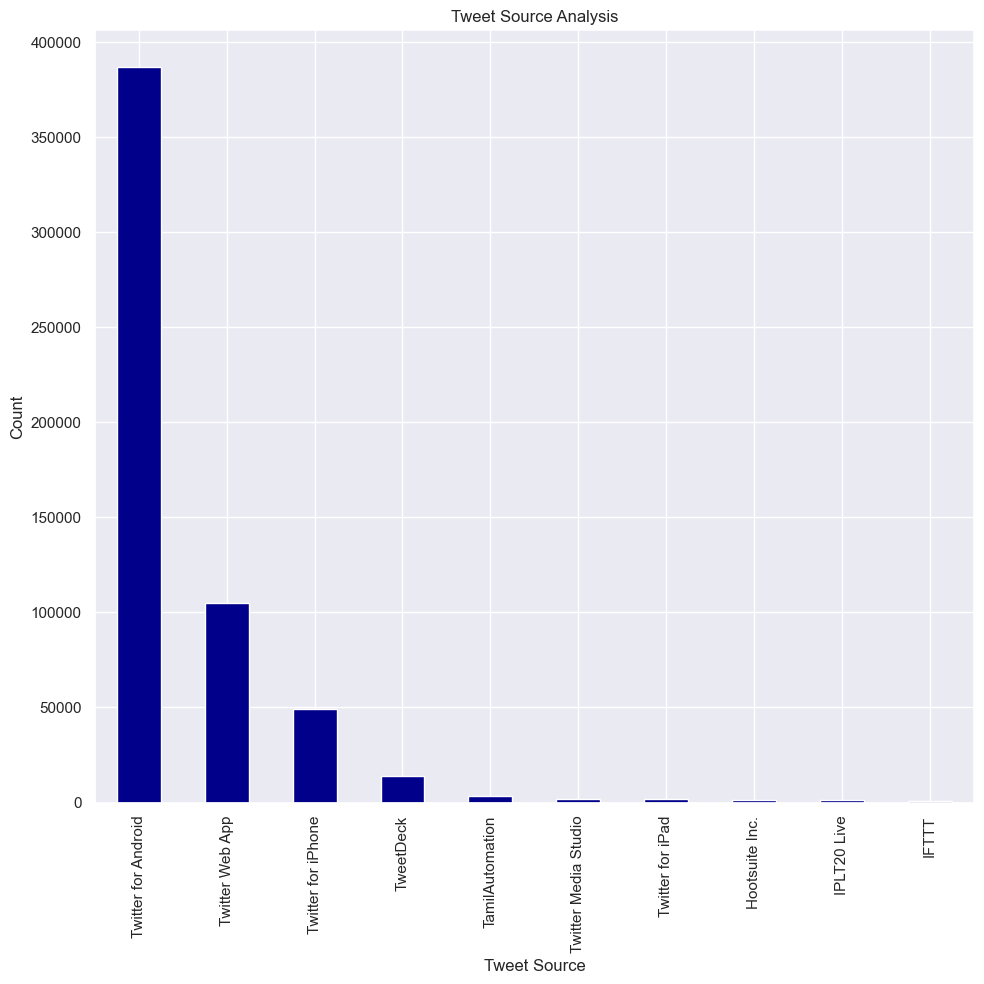

In [157]:
# Plotting the graph
plt.figure(figsize=(10, 10))
source_counts.plot(kind='bar', color='darkblue')
plt.xlabel('Tweet Source')
plt.ylabel('Count')
plt.title('Tweet Source Analysis')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()